In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset=pd.read_csv('data.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [5]:
print(dataset.shape)

(270, 14)


In [6]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


No NUll Value here

In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# EDA

<AxesSubplot:>

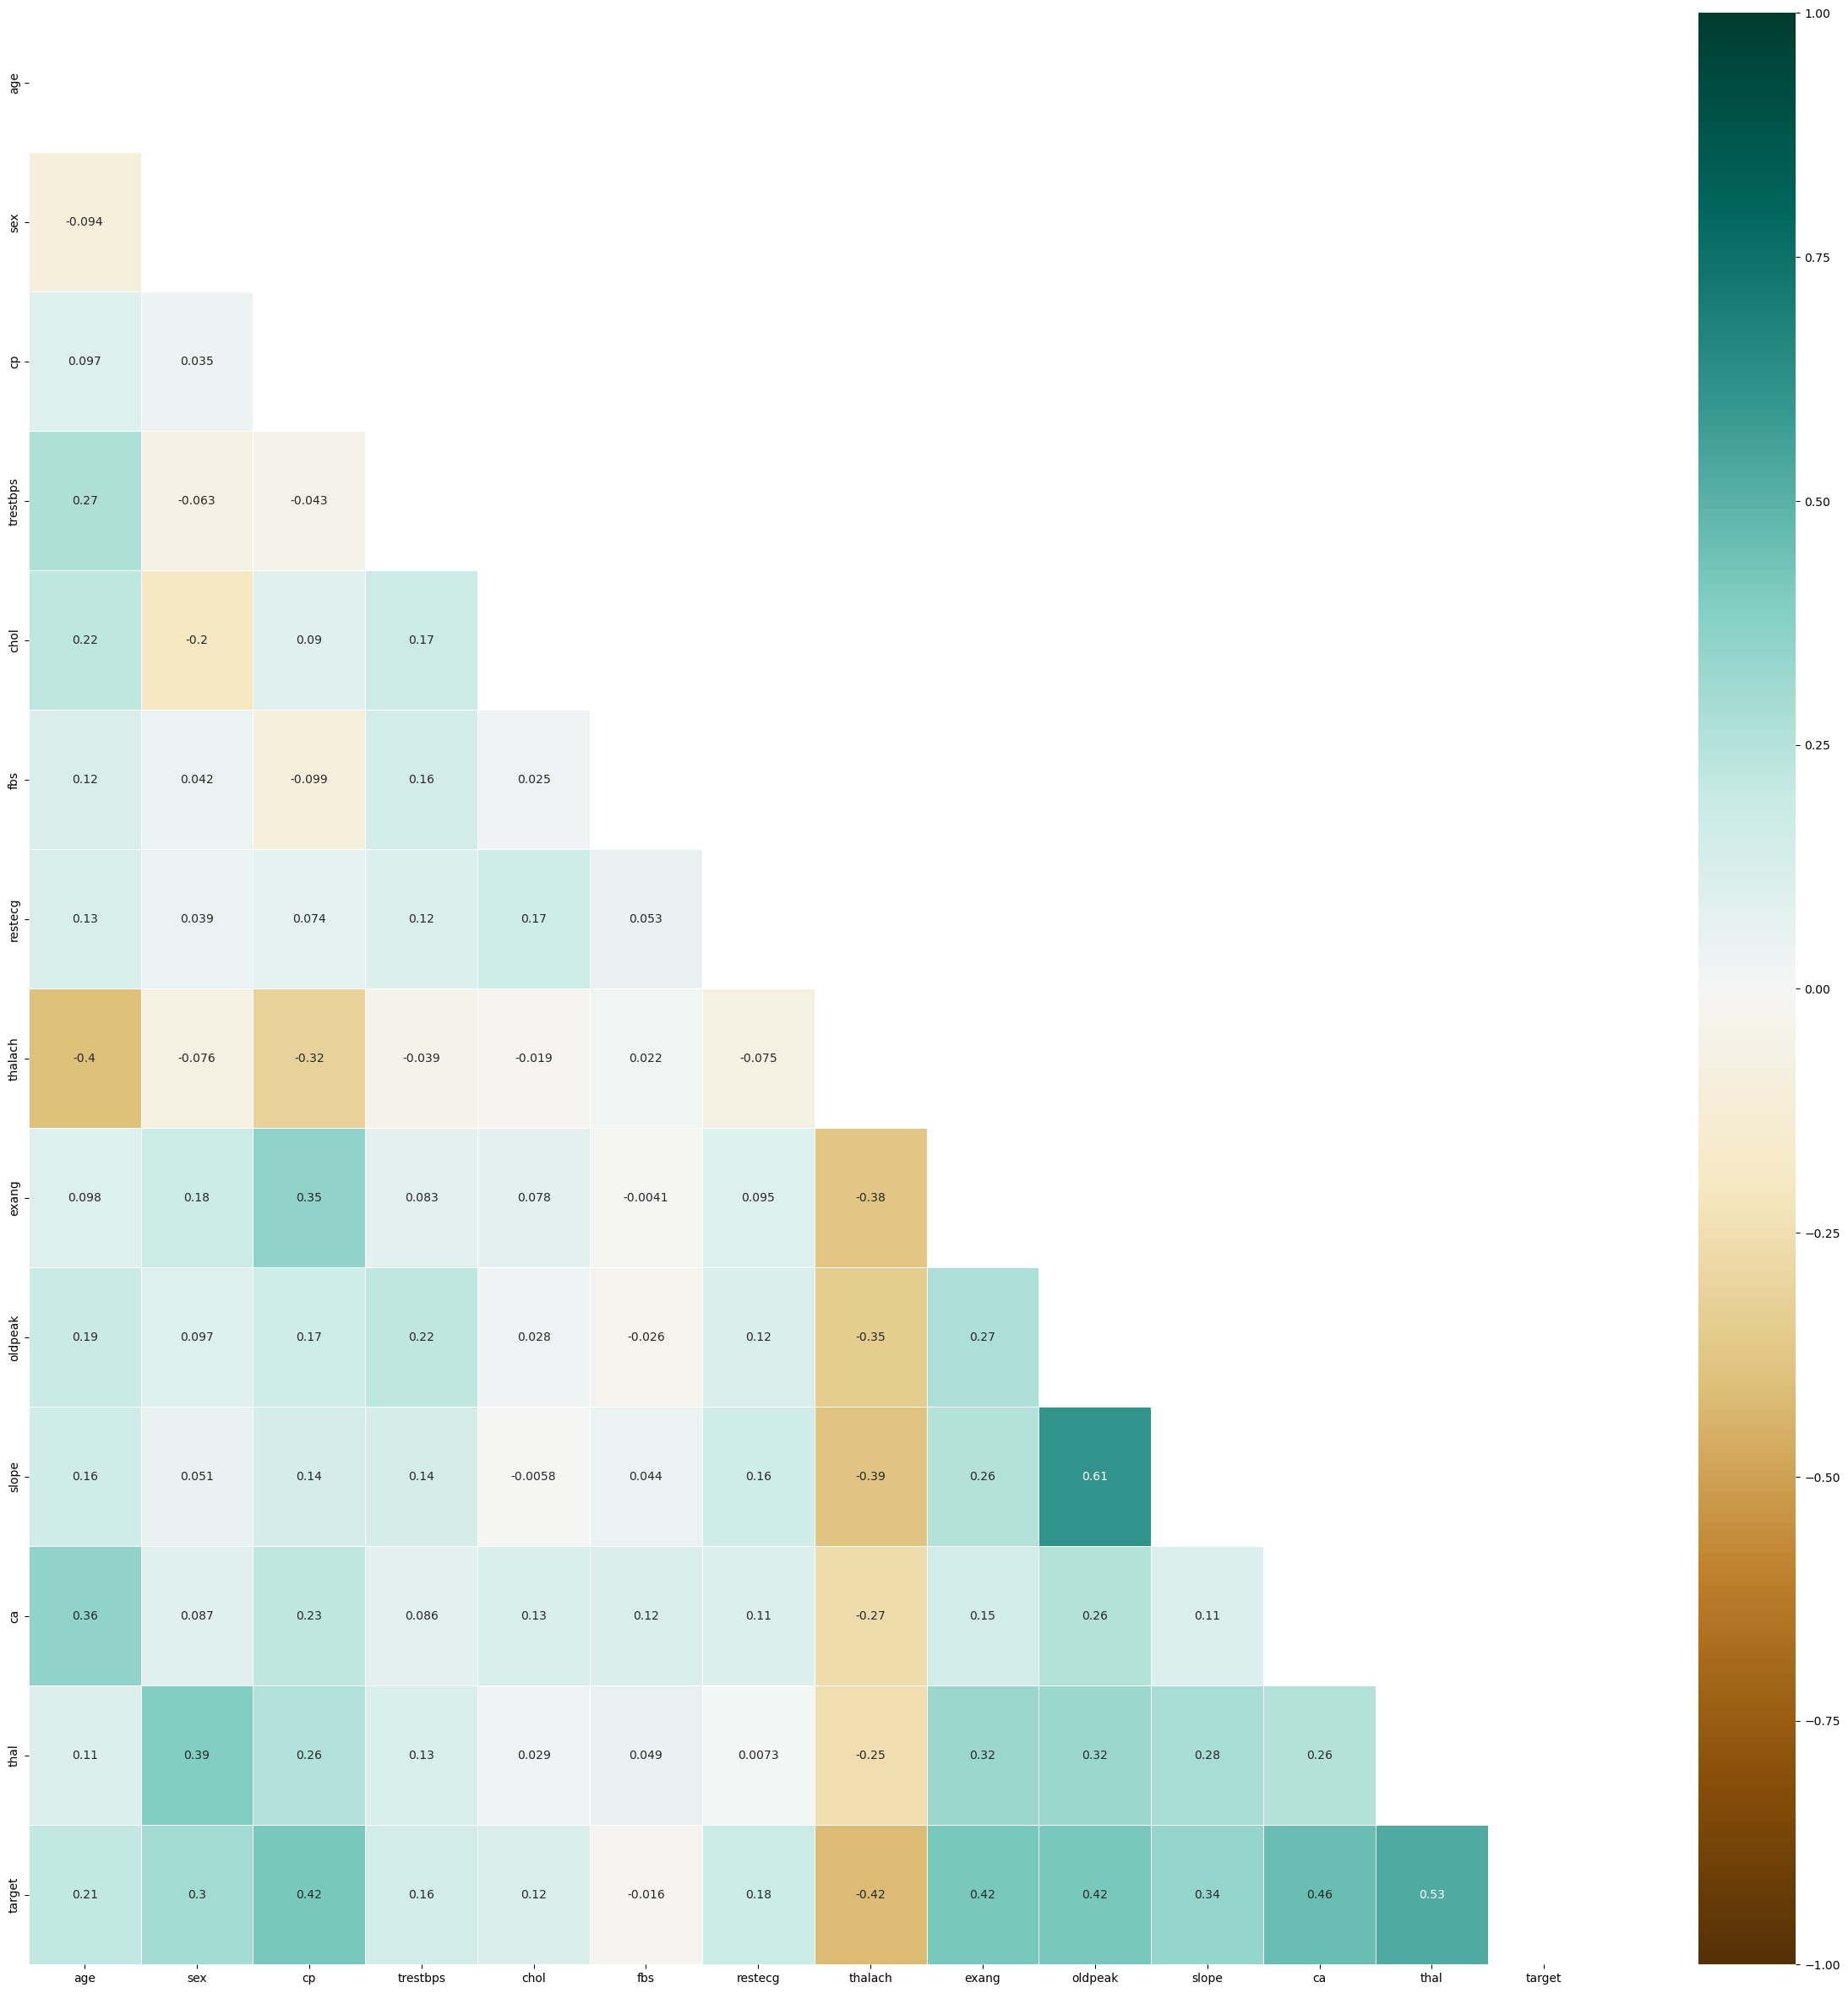

In [10]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [11]:
dataset['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [12]:
# Percentage of patients have and do not have heart disease
dataset['target'].value_counts()/dataset.shape[0]*100

1    55.555556
2    44.444444
Name: target, dtype: float64

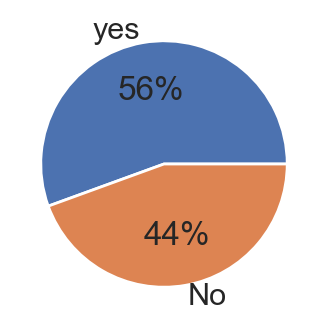

In [13]:
# Create a plot to display the percentage of the positive and negative heart disease
labels = ['yes', 'No']
values = dataset['target'].value_counts().values
sns.set_theme(context='poster')
plt.figure(figsize=(4,4))
#plt.title('Heart Diseases', color="Black",fontsize=18)

plt.pie(values, labels=labels, autopct='%1.0f%%')
#plt.title('People who got Heart Disease')
plt.show()

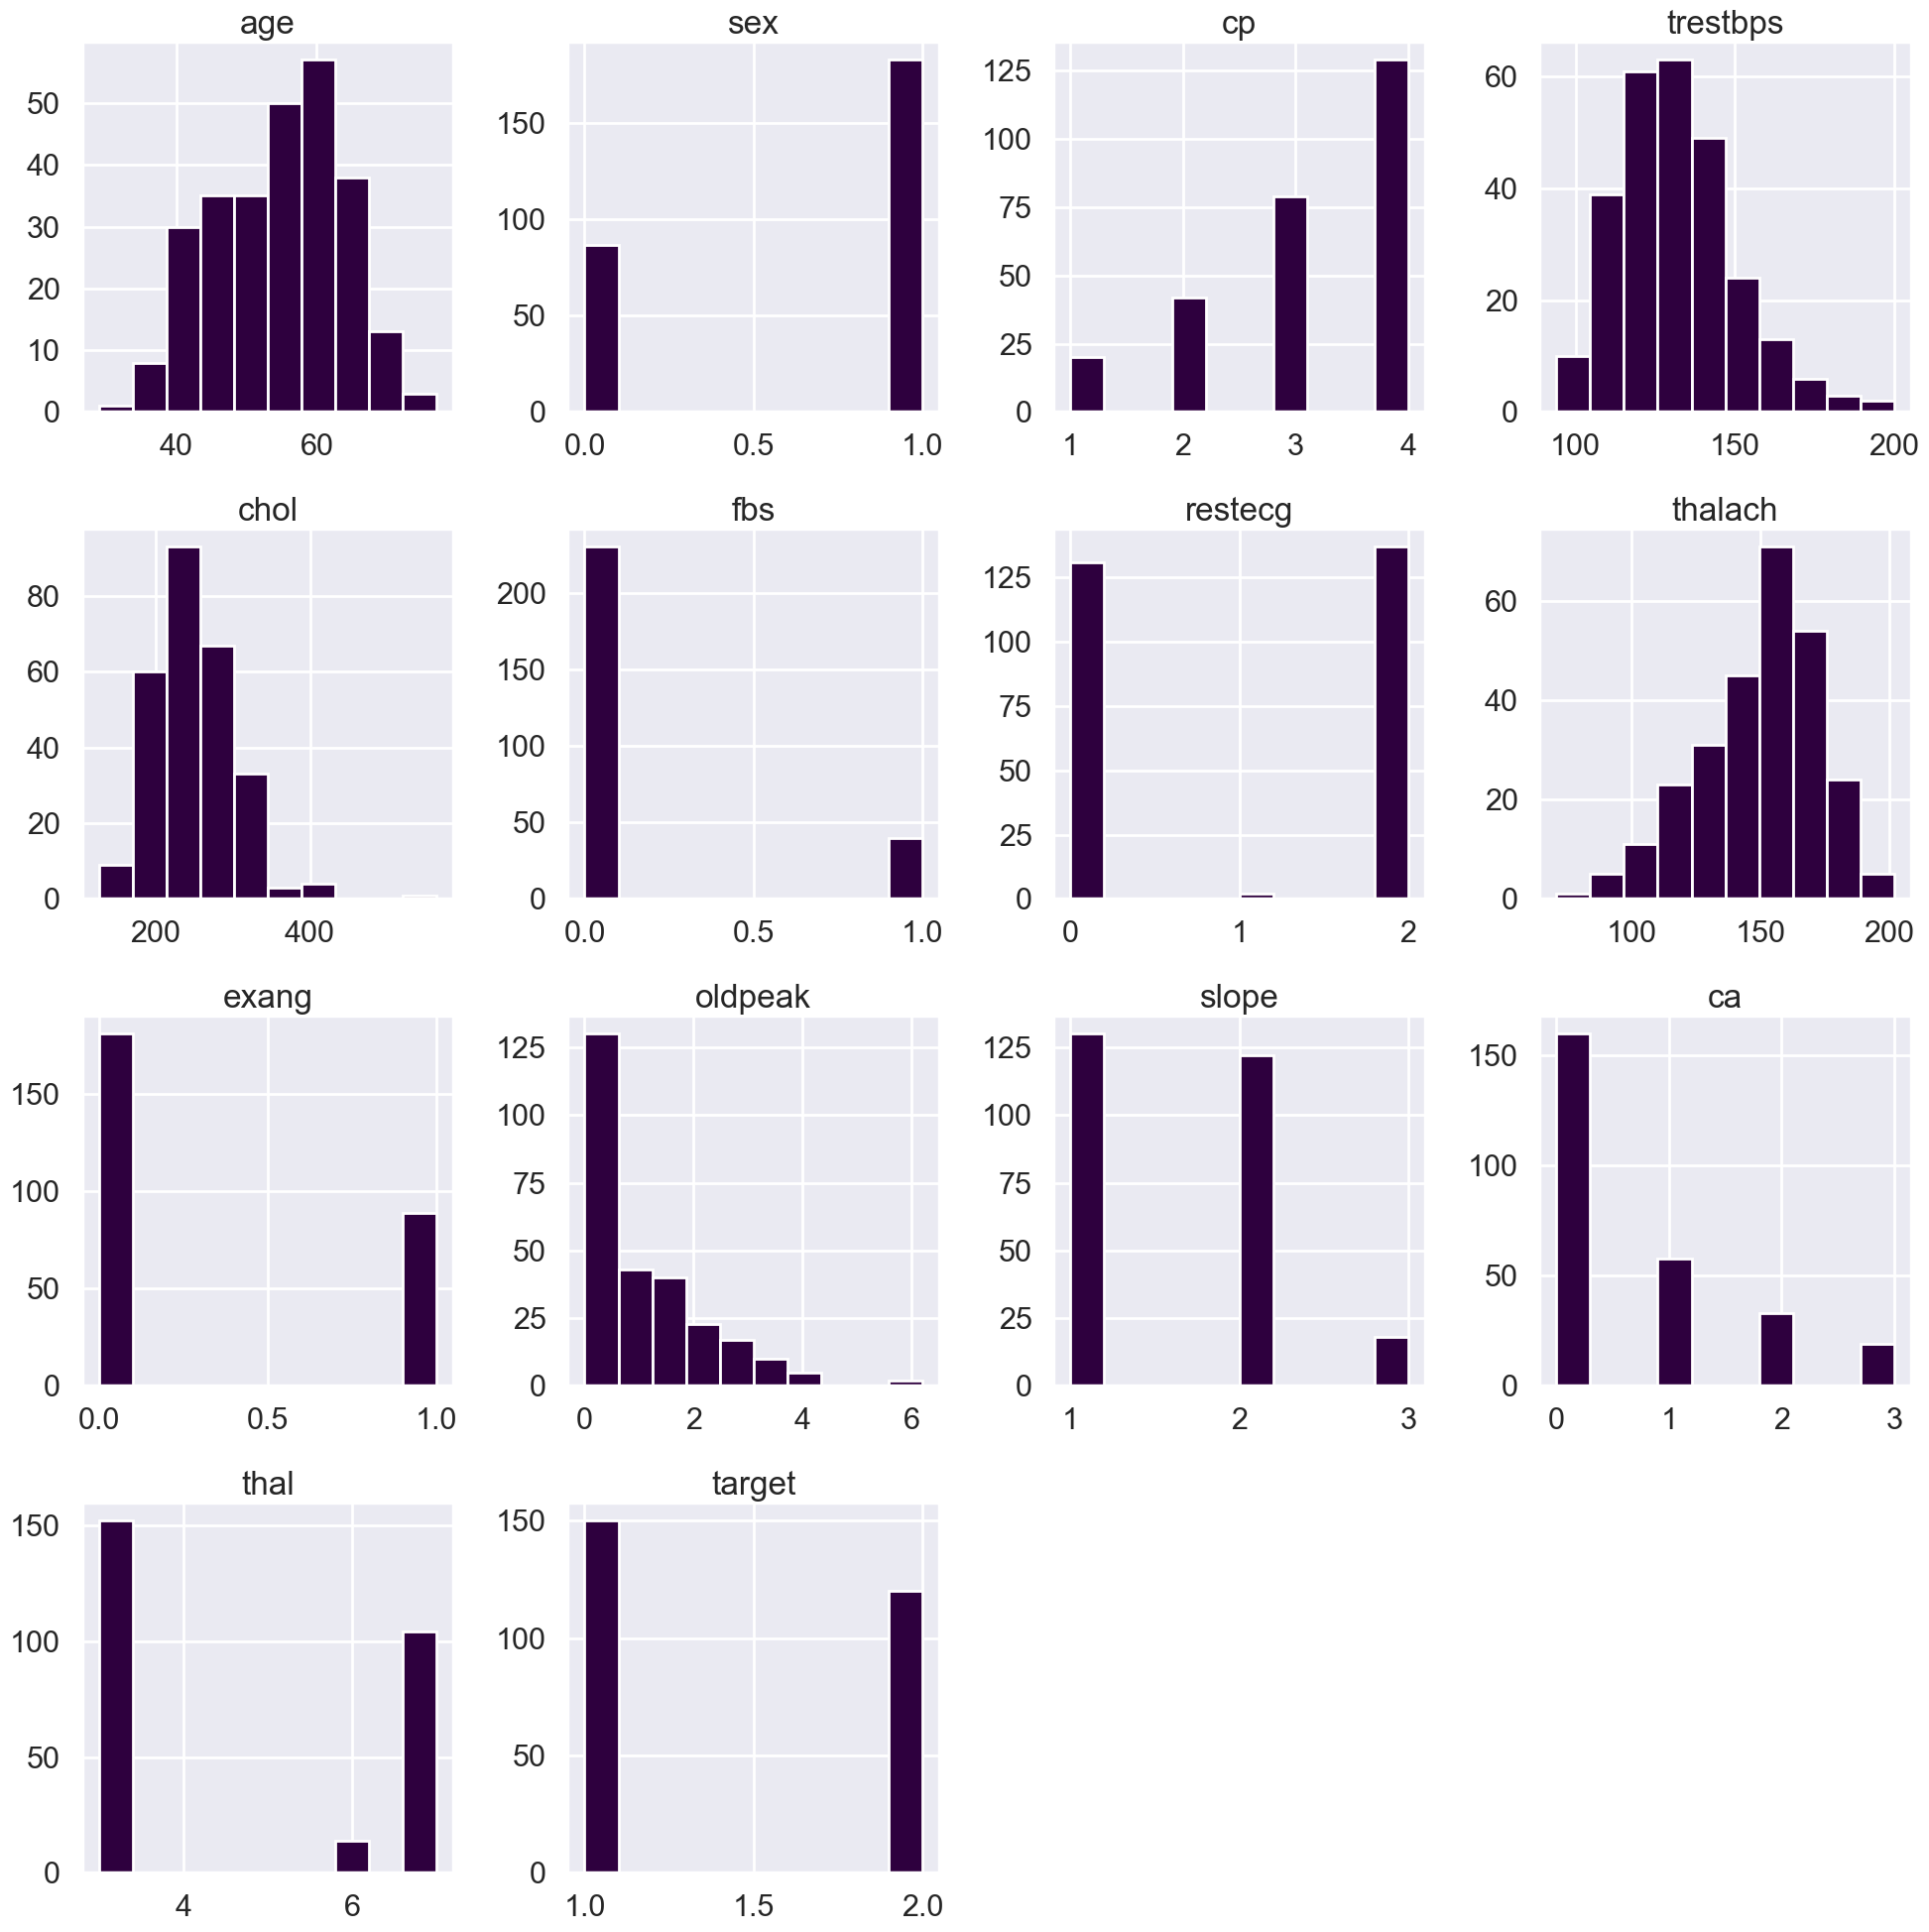

In [14]:
dataset.hist(figsize = (20,20),color='#2e003e')
plt.tight_layout()
plt.show()

In [15]:
#checking the variance
dataset.var()

age           82.975093
sex            0.219207
cp             0.902671
trestbps     319.037051
chol        2671.467107
fbs            0.126669
restecg        0.995787
thalach      536.650434
exang          0.221795
oldpeak        1.311506
slope          0.377475
ca             0.890940
thal           3.766157
target         0.247831
dtype: float64

There is huge variance that's why we need to normalize this out.

# Normalized

In [16]:
dataset['trestbps']=np.log(dataset['trestbps'])
dataset['chol']=np.log(dataset['chol'])
dataset['thalach']=np.log(dataset['thalach'])

np.var(dataset[["trestbps",'chol','thalach']])

trestbps    0.017561
chol        0.039953
thalach     0.027642
dtype: float64

# Numerical Features

In [17]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3,2
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7,1
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7,2
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7,1
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3,1


# Discrete Features

In [18]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 9


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Continuous Features

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 5


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical Features

In [20]:
# Categorical Variables
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

[]

# Outliers

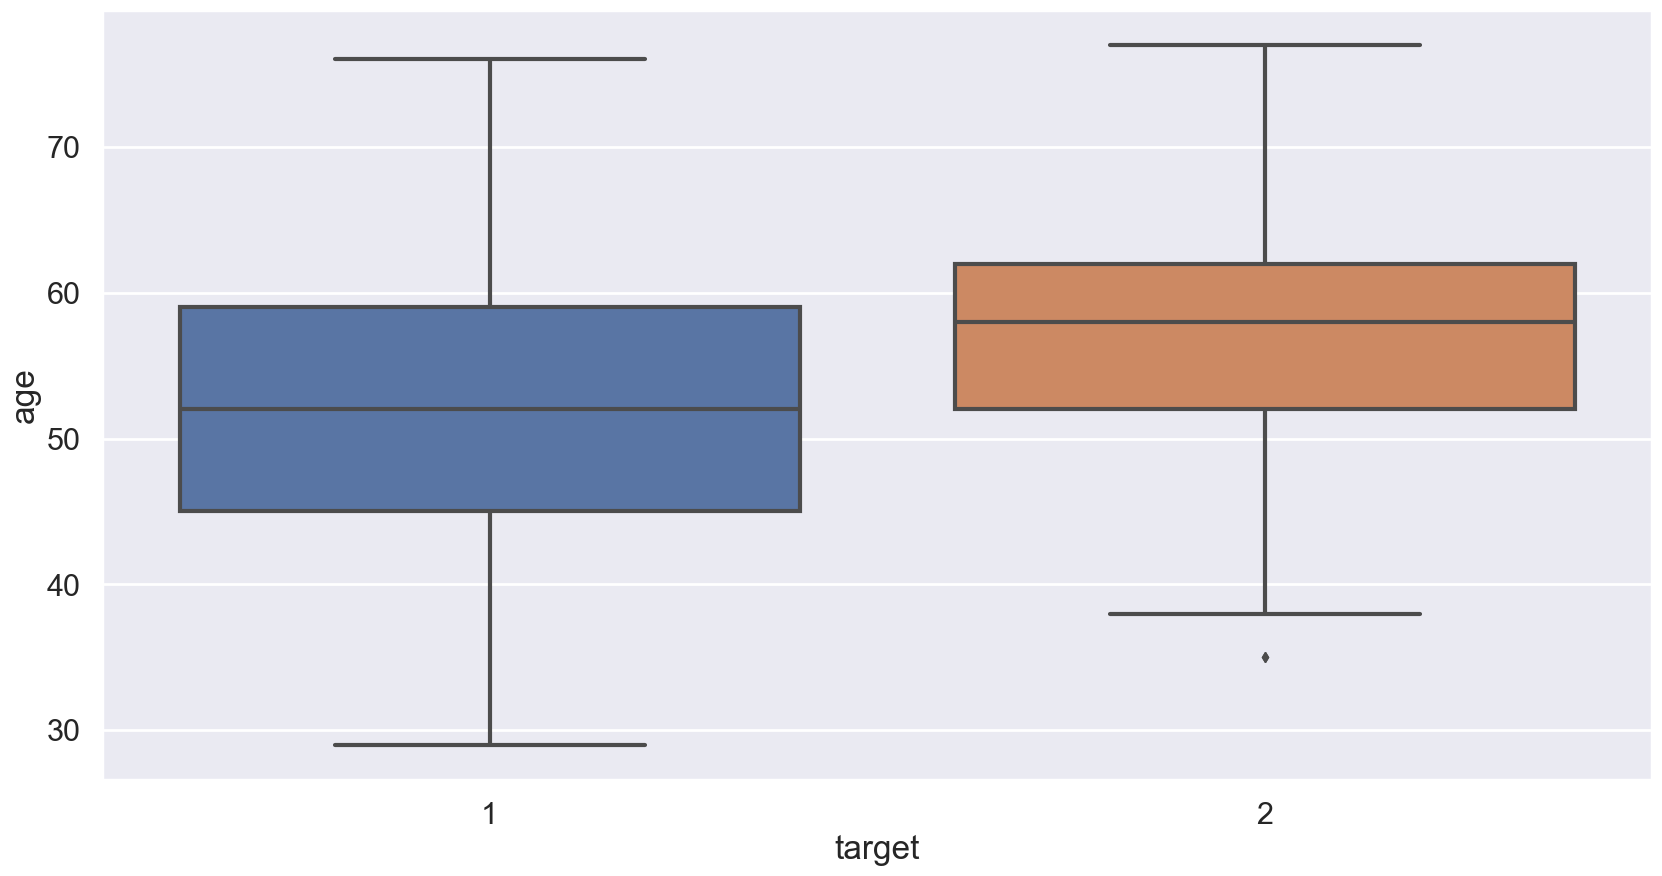

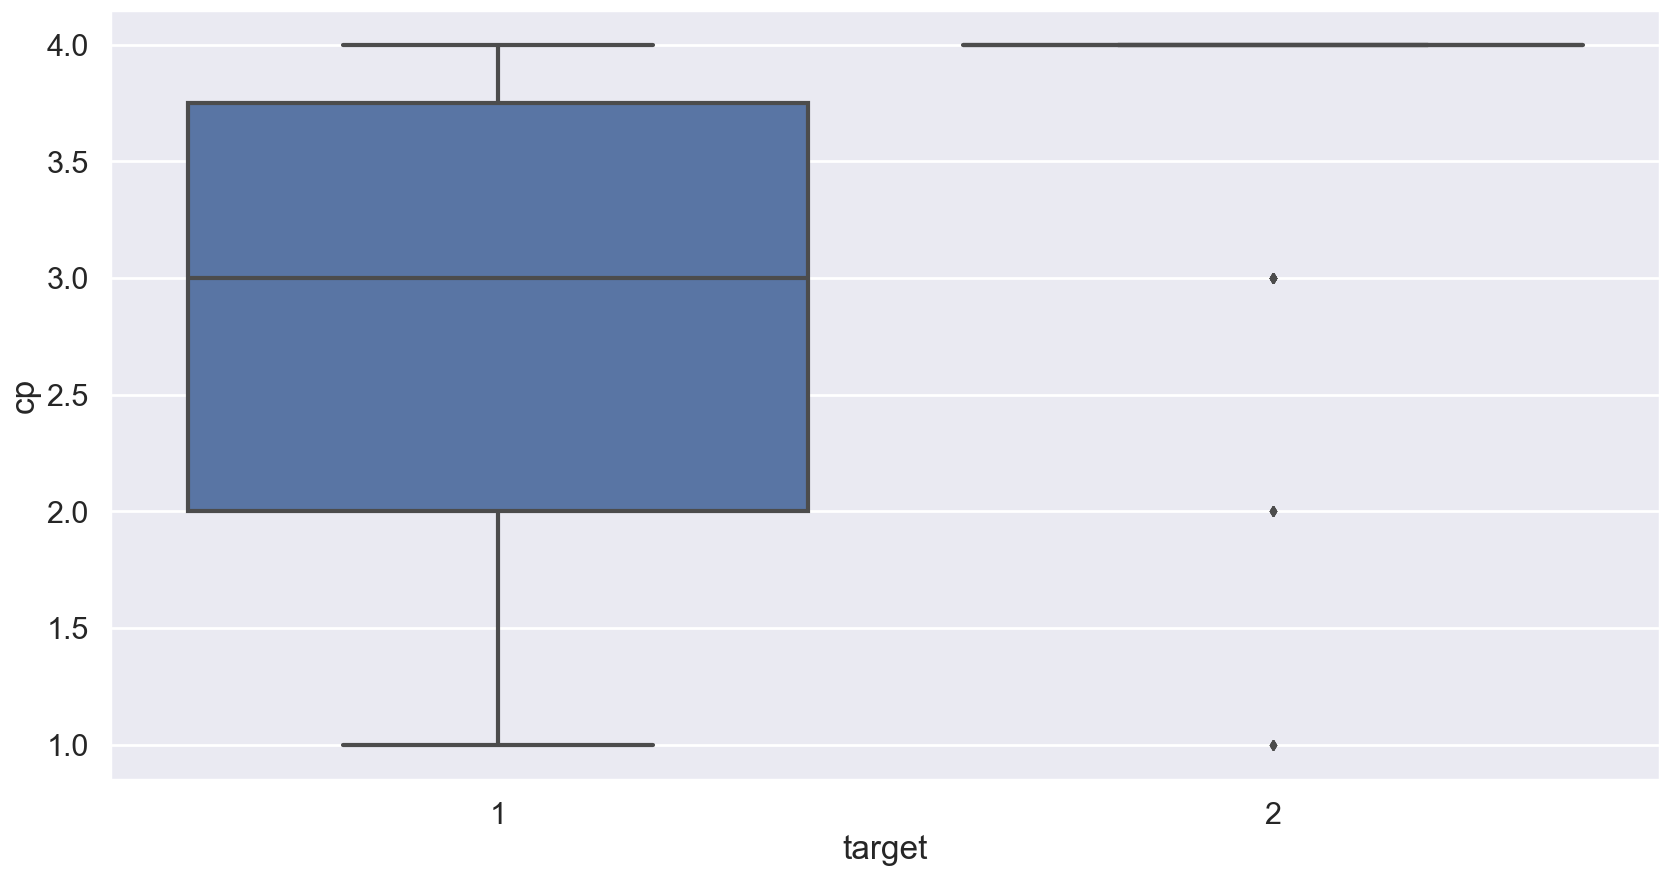

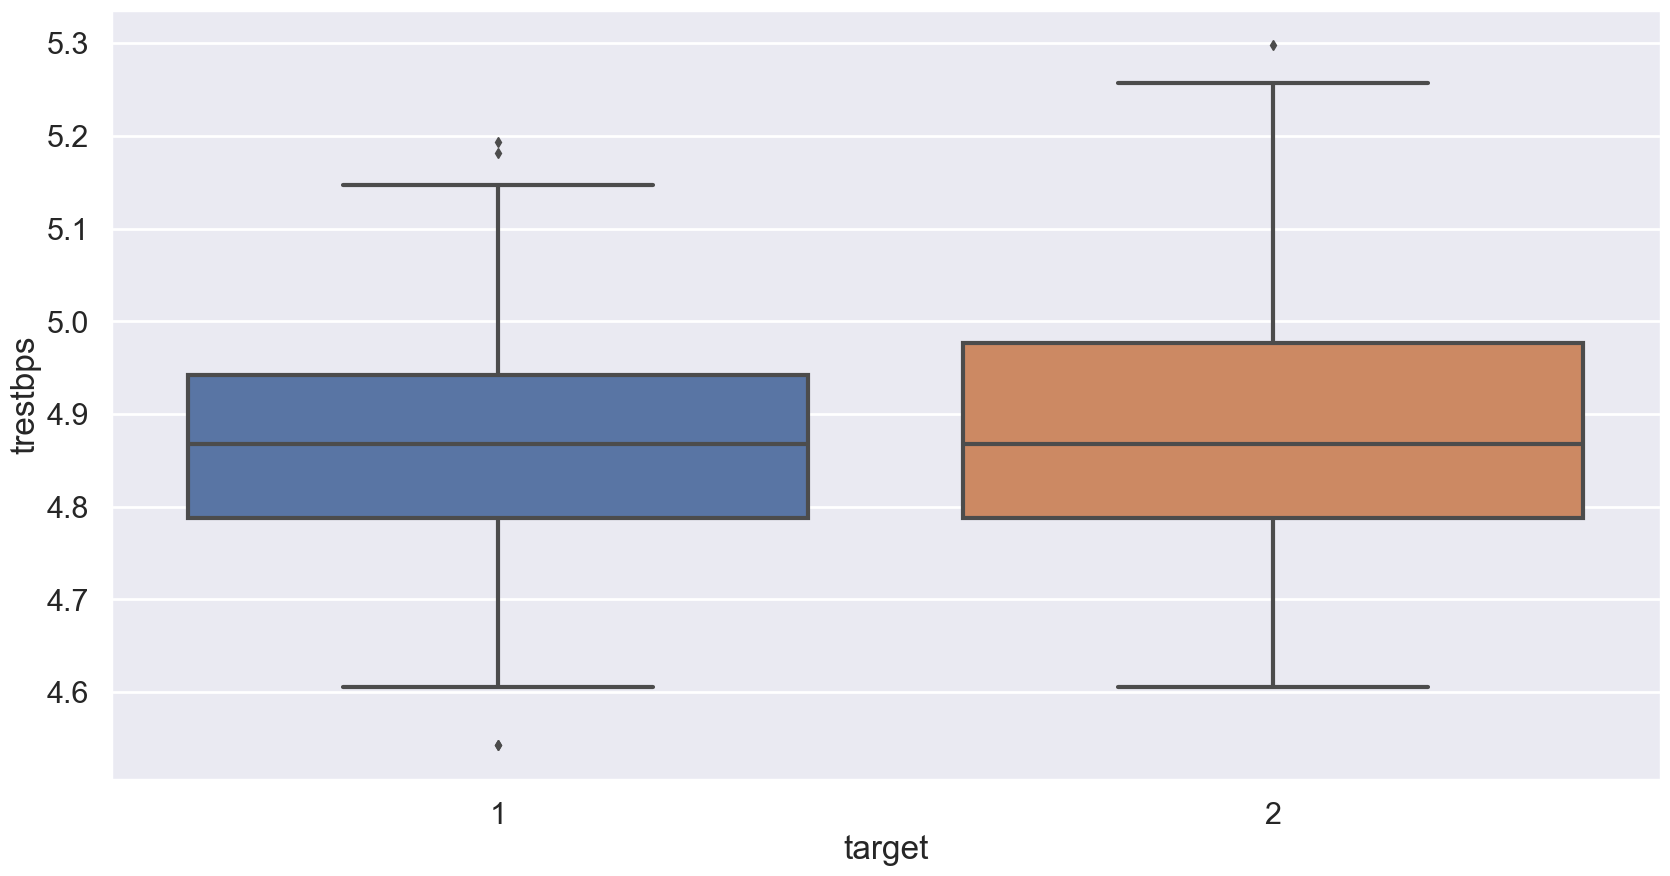

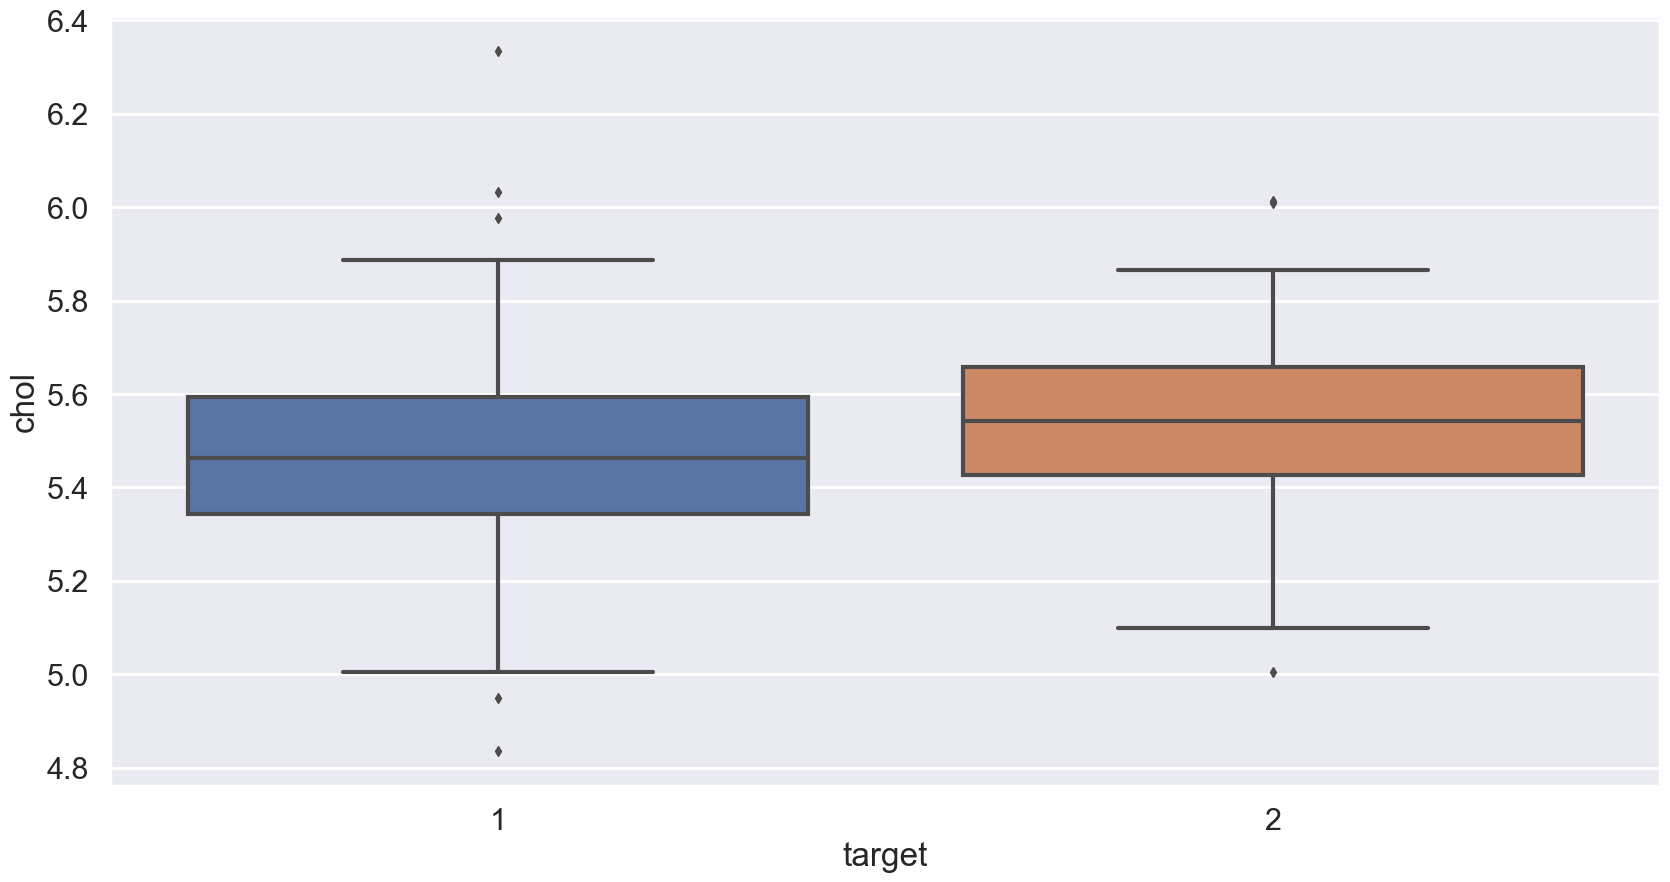

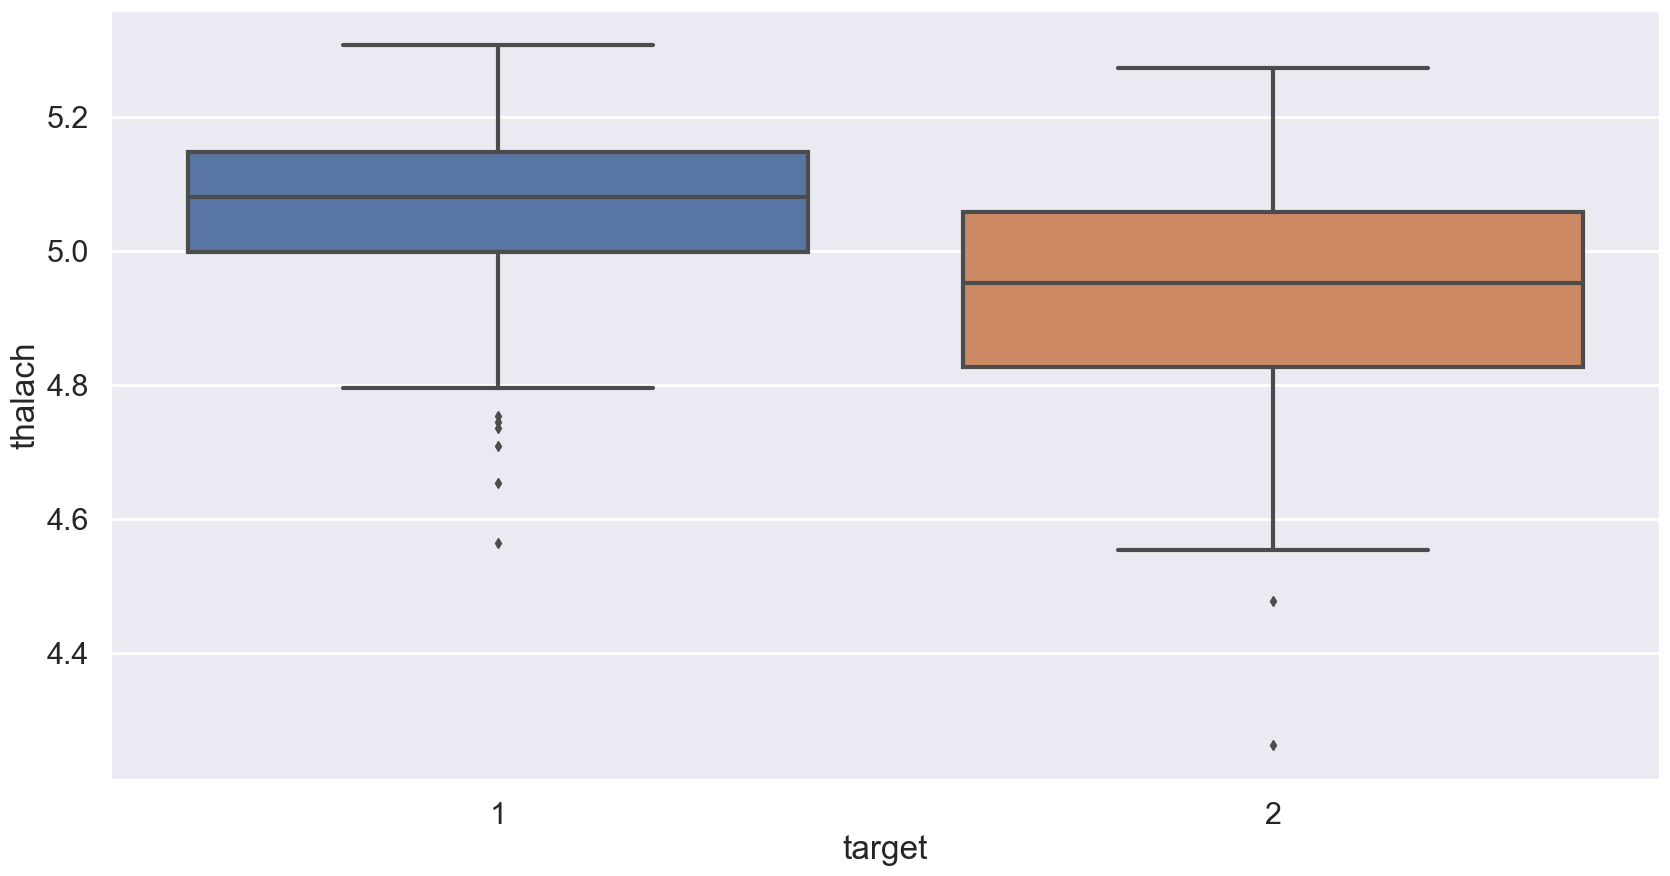

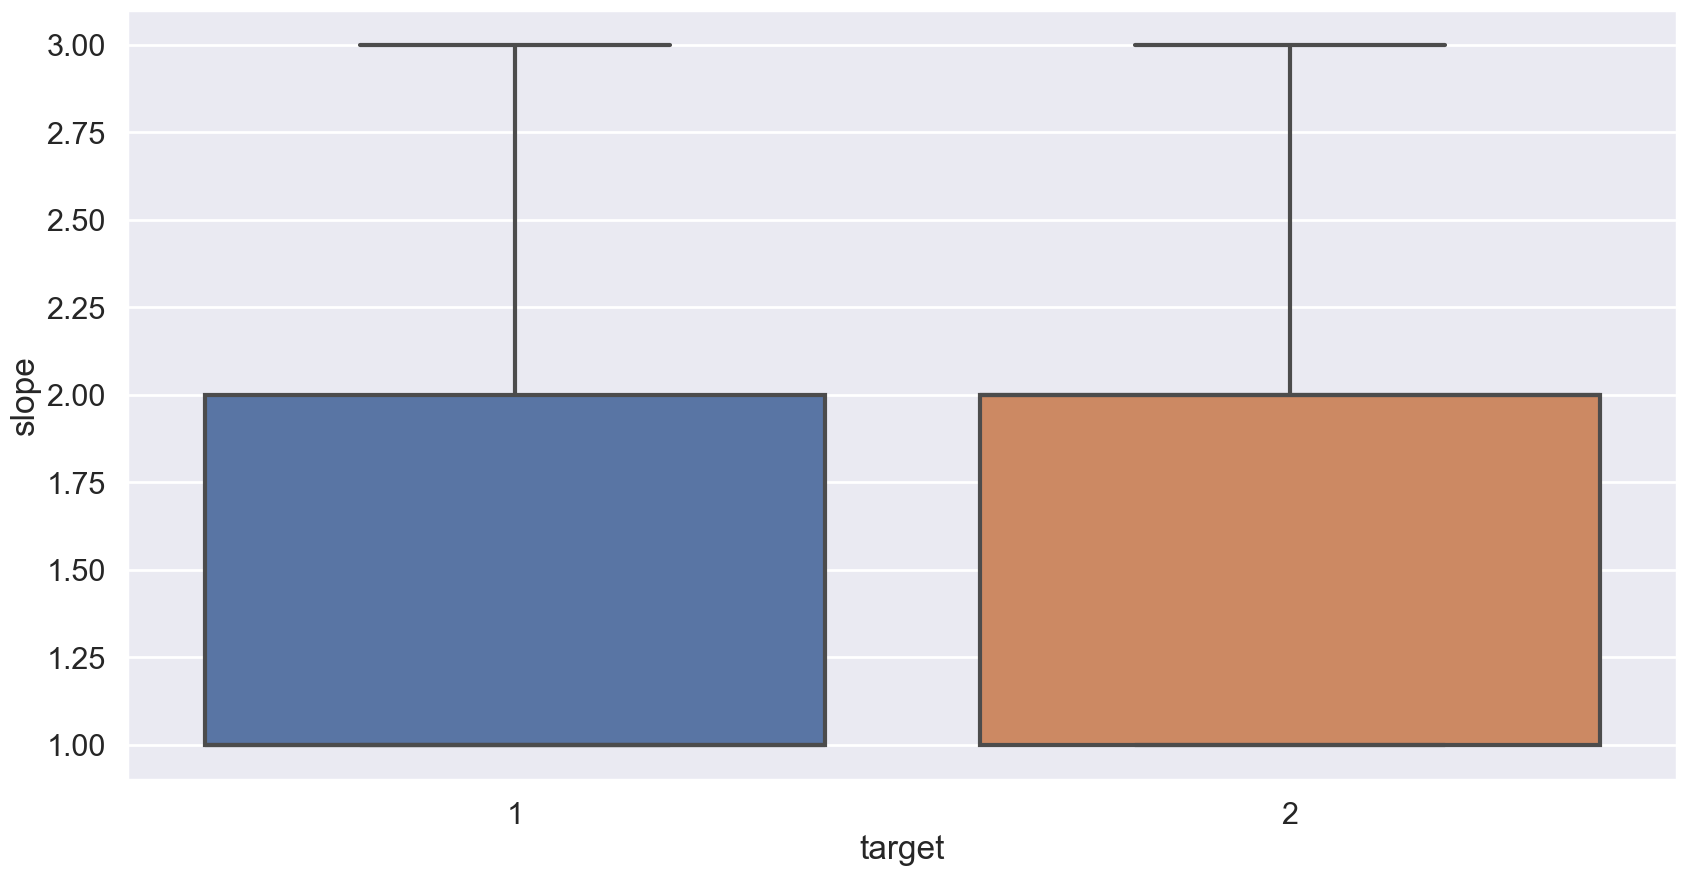

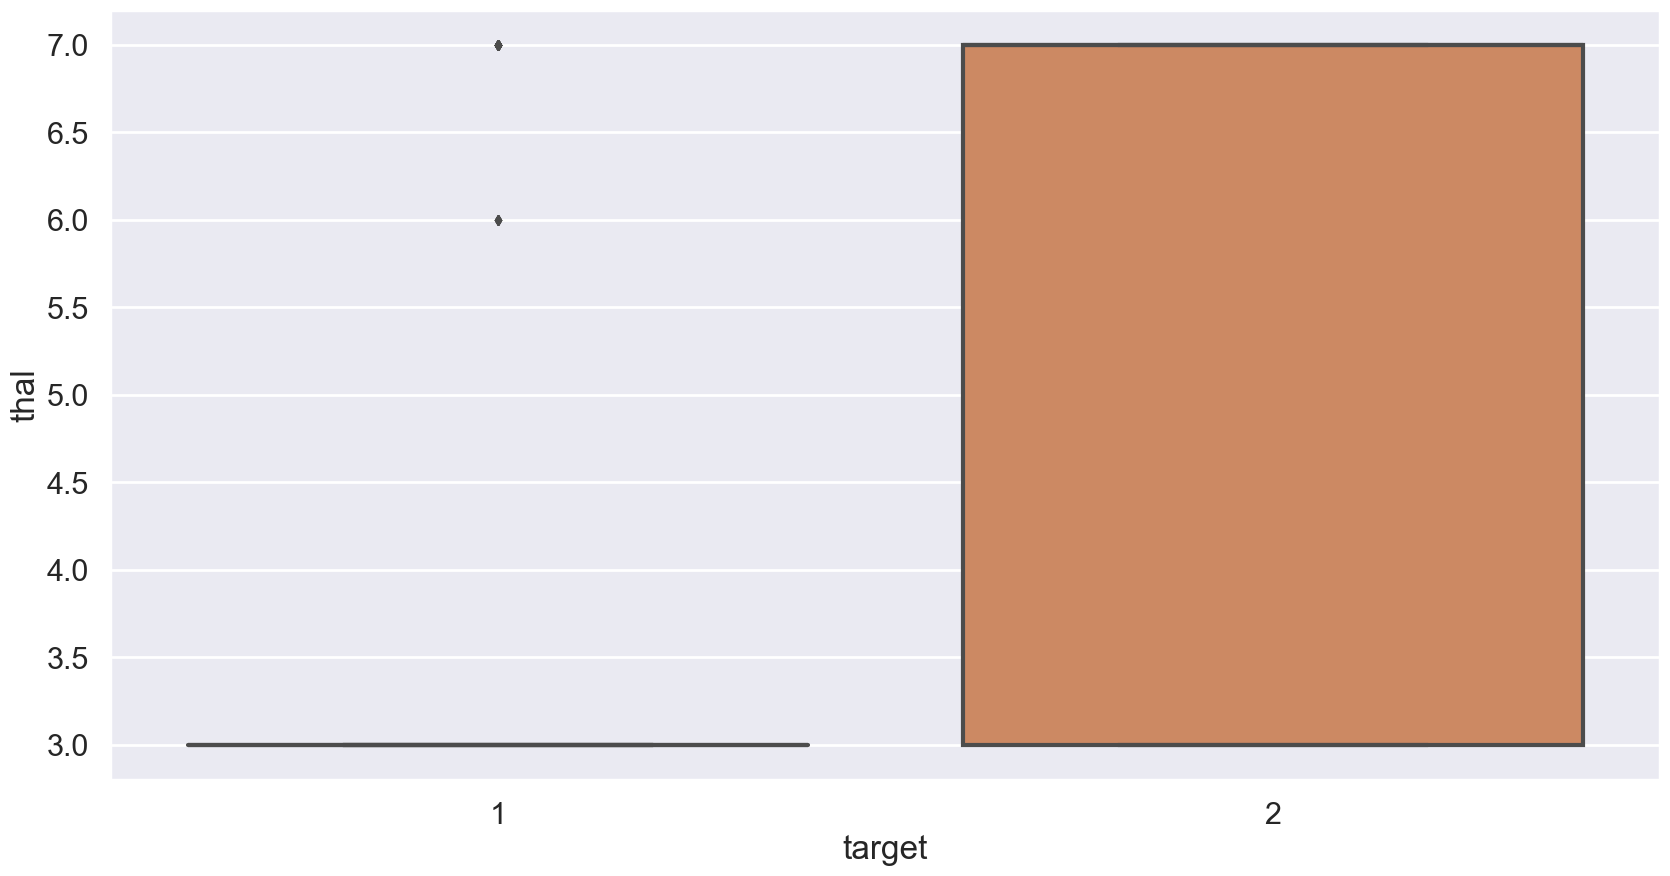

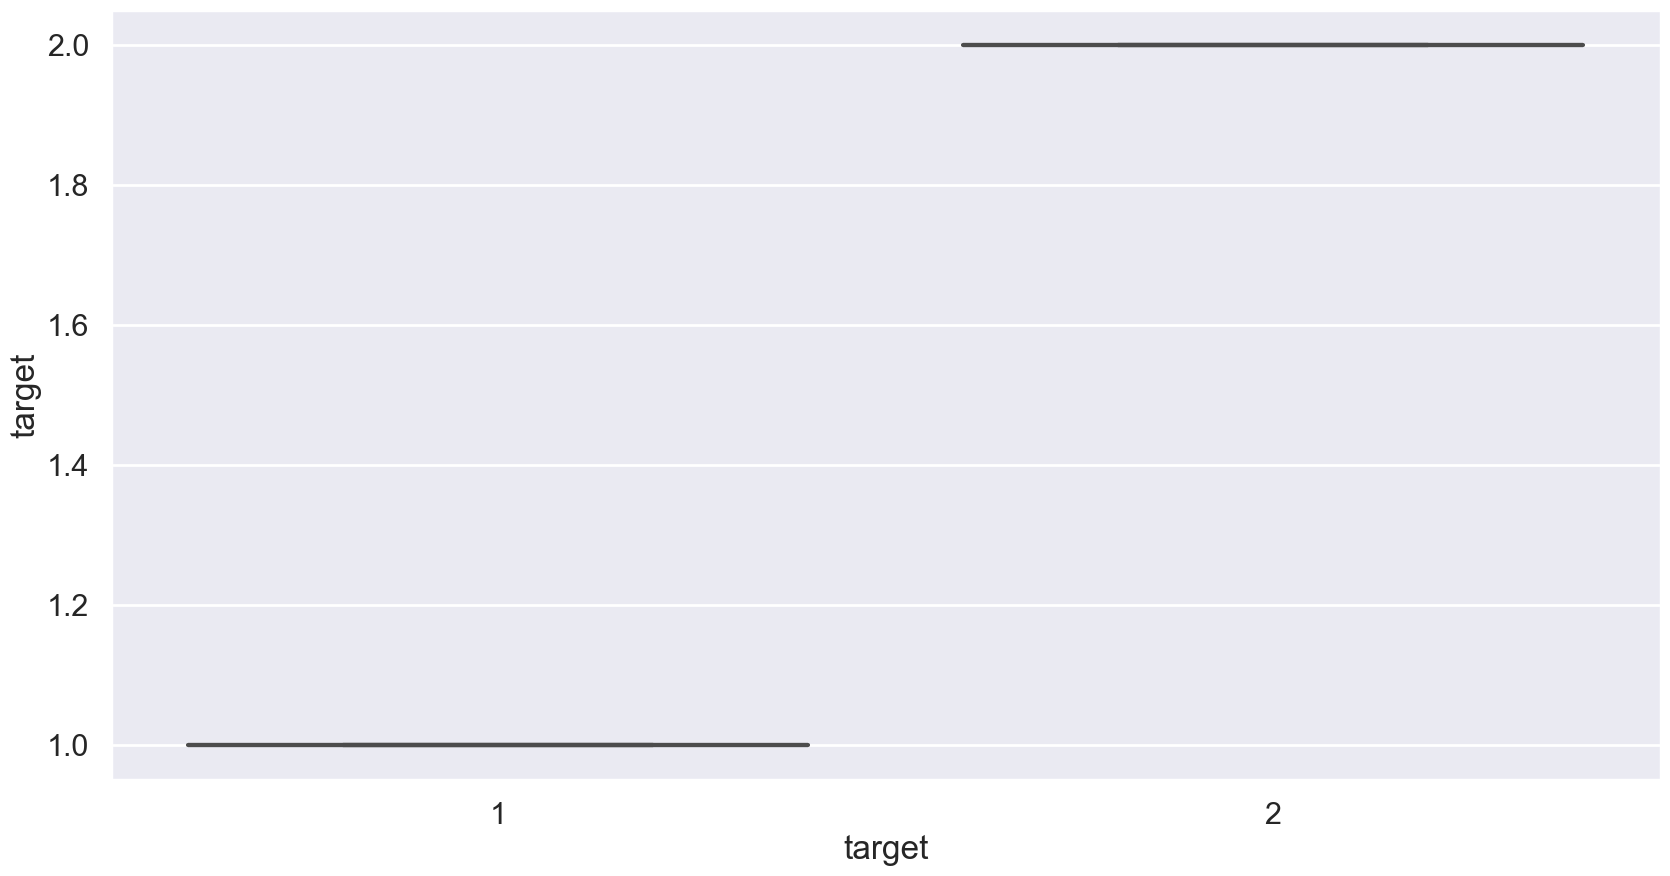

In [21]:
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.boxplot(data,x='target',y=feature)
        plt.show()

# Data splitting

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = dataset.drop('target', axis = 1)
y = dataset['target']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

# Data Balancing

SMOTE Technique

In [23]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 0)
xtrain, ytrain = smt.fit_resample(xtrain, ytrain)

print(f'Distribution AFTER balancing:\n{ytrain.value_counts()}')

Distribution AFTER balancing:
1    112
2    112
Name: target, dtype: int64


# FEATURE SCALING

In [24]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

xtrain=ss.fit_transform(xtrain)
xtrain=mms.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)
xtest=mms.fit_transform(xtest)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3,2
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7,1
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7,2
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7,1
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3,1


In [25]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['target']]
len(scaling_feature)

13

In [26]:
mask = ~np.isfinite(dataset)

# count the number of infinite or NaN values in each column
column_sum = mask.sum(axis=0)

# print the column(s) with infinite or NaN values and the number of occurrences
print(column_sum[column_sum > 0])

Series([], dtype: int64)


# FEATURE SELECTION

1. Variane Threshold

In [27]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(xtrain)

VarianceThreshold(threshold=0)

In [28]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [29]:
sum(var_thres.get_support())

13

this has not helped in selecting any feature on the basis of variance

2. MUTUAL INFORMATION FEATURE SELECTION

In [30]:
from sklearn.feature_selection import mutual_info_classif

In [31]:
mutual_info=mutual_info_classif(X,y)

In [32]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

thal        0.136927
ca          0.130777
cp          0.095832
slope       0.082199
oldpeak     0.074886
trestbps    0.068459
thalach     0.065560
exang       0.062963
restecg     0.061606
chol        0.061043
sex         0.031879
age         0.003269
fbs         0.000000
dtype: float64

<Figure size 1000x1000 with 0 Axes>

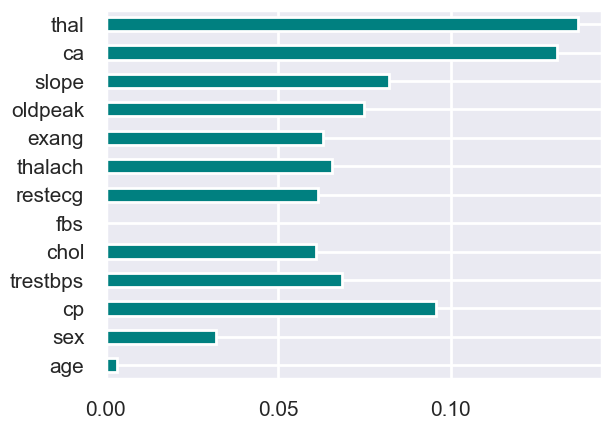

<Figure size 1000x1000 with 0 Axes>

In [33]:
from matplotlib.pyplot import figure
mutual_data.plot(kind='barh',color='teal',fontsize=15)
figure(figsize=(10, 10) )

In [34]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


3. FORWARD FEATURE SELECTION

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
forward_feature_selection= SequentialFeatureSelector(ExtraTreesClassifier(n_jobs=-1), k_features=(1,7), forward=True,floating=False, verbose=2,scoring='accuracy',cv=5).fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   22.8s finished

[2023-12-29 10:04:18] Features: 1/7 -- score: 0.7947474747474748[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   17.5s finished

[2023-12-29 10:04:36] Features: 2/7 -- score: 0.7992929292929293[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   14.9s finished

[2023-12-29 10:04:51] Features: 3/7 -- score: 0.7947474747474749[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [36]:
forward_feature_selection.k_feature_names_

('1', '2', '9', '11', '12')

this means :-('age', 'cp', 'chol', 'restecg', 'thalach', 'ca', 'thal')

In [37]:
forward_feature_selection.k_score_

0.8526262626262626

In [38]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7111111111111111, 0.8222222222222222, 0.844...",0.794747,"(12,)",0.060441,0.047025,0.023513
2,"(1, 12)","[0.7111111111111111, 0.8222222222222222, 0.844...",0.799293,"(1, 12)",0.064355,0.05007,0.025035
3,"(1, 2, 12)","[0.7777777777777778, 0.8, 0.8222222222222222, ...",0.794747,"(1, 2, 12)",0.032289,0.025122,0.012561
4,"(1, 2, 11, 12)","[0.8, 0.8444444444444444, 0.8222222222222222, ...",0.80798,"(1, 2, 11, 12)",0.029675,0.023088,0.011544
5,"(1, 2, 9, 11, 12)","[0.7777777777777778, 0.9333333333333333, 0.866...",0.852626,"(1, 2, 9, 11, 12)",0.064309,0.050035,0.025017
6,"(1, 2, 5, 9, 11, 12)","[0.7777777777777778, 0.9111111111111111, 0.844...",0.834848,"(1, 2, 5, 9, 11, 12)",0.058664,0.045643,0.022821
7,"(0, 1, 2, 5, 9, 11, 12)","[0.8, 0.9111111111111111, 0.8444444444444444, ...",0.839192,"(0, 1, 2, 5, 9, 11, 12)",0.049664,0.03864,0.01932


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# Model creation without feature selection

In [290]:
def model(classifier):
    
    classifier.fit(xtrain,ytrain)
    prediction = classifier.predict(xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(ytest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,xtrain,ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(ytest,prediction)))
    print("Error Rate: ",'{0:.2%}'.format(1-accuracy_score(ytest,prediction)))
    plot_roc_curve(classifier, xtest,ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(ytest,classifier.predict(xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(ytest,classifier.predict(xtest)))

# 1. Logistic regression

I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [218]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

acc=accuracy_score(ytest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, lr.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 86.16071428571429 %
Testing accuracy score of the model is: 80.88235294117648 %


Accuracy :  80.88%
Cross Validation Score :  92.16%
ROC_AUC Score :  80.79%
Error Rate:  19.12%


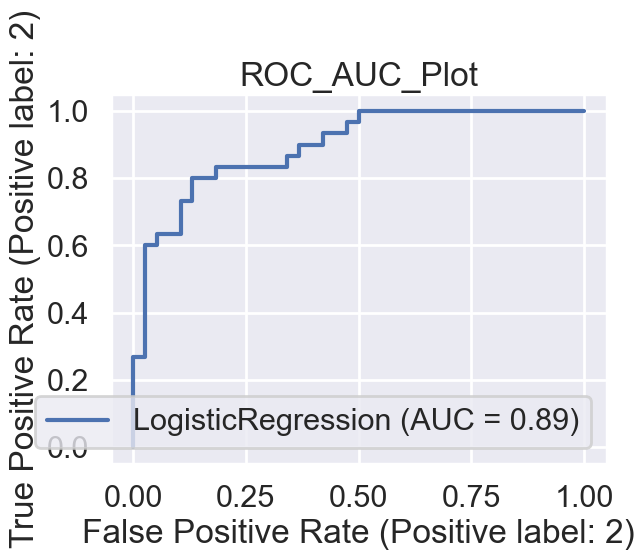

In [219]:
model(lr)

In [42]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[31  7]
 [ 6 24]]
Classification Report               precision    recall  f1-score   support

           1       0.84      0.82      0.83        38
           2       0.77      0.80      0.79        30

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.81      0.81      0.81        68



I.   WITHOUT FEATURE SELECTION
II.  BALANCED
III. With HYPERPARAMETER TUNING(GridsearchCV)

In [43]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [44]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [45]:
classifier_regressor.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [46]:
print(classifier_regressor.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [47]:
print(classifier_regressor.best_score_)

0.8704040404040405


In [48]:
ypred = classifier_regressor.predict(xtest)

acc2=accuracy_score(ytest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_regressor.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 87.94642857142857 %
Testing accuracy score of the model is: 77.94117647058823 %


In [49]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[29  9]
 [ 6 24]]
Classification Report               precision    recall  f1-score   support

           1       0.83      0.76      0.79        38
           2       0.73      0.80      0.76        30

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



# 2. KNearestNeighbors

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain,ytrain)

ypred1 = knn.predict(xtest)

acc3=accuracy_score(ytest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred1)*100,"%")

Training accuracy score of the model is: 83.48214285714286 %
Testing accuracy score of the model is: 80.88235294117648 %


Accuracy :  80.88%
Cross Validation Score :  87.91%
ROC_AUC Score :  80.44%
Error Rate:  19.12%


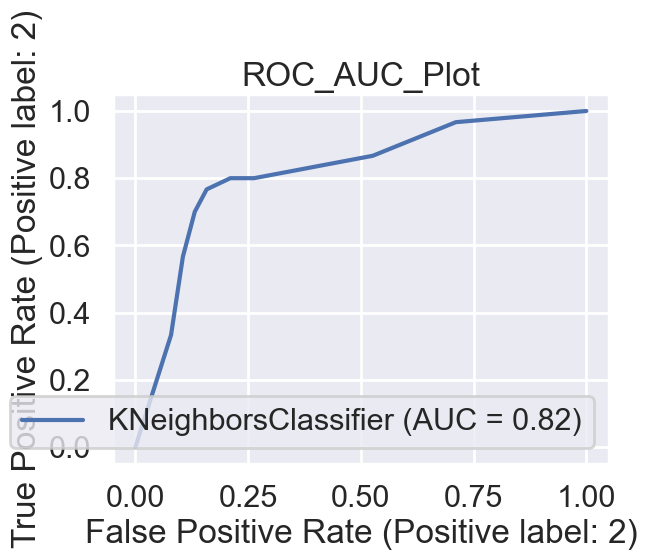

In [221]:
model(knn)

In [51]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))

print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[32  6]
 [ 7 23]]
Classification Report               precision    recall  f1-score   support

           1       0.82      0.84      0.83        38
           2       0.79      0.77      0.78        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.81        68
weighted avg       0.81      0.81      0.81        68



I. WITHOUT FEATURE SELECTION II. BALANCED III. With HYPERPARAMETER TUNING(GridsearchCV)

In [52]:
k_range = list(range(1, 31))
parameter = dict(n_neighbors=k_range)

In [53]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=False, verbose=1)

In [54]:
classifier_knn.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [55]:
print(classifier_knn.best_params_)

{'n_neighbors': 7}


In [56]:
print(classifier_knn.best_score_)

0.8214141414141414


In [57]:
ypred = classifier_knn.predict(xtest)

acc4=accuracy_score(ytest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_knn.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 83.92857142857143 %
Testing accuracy score of the model is: 80.88235294117648 %


In [58]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred))

print("Classification Report",classification_report(ytest,ypred))

Confusion matrix of the model [[31  7]
 [ 6 24]]
Classification Report               precision    recall  f1-score   support

           1       0.84      0.82      0.83        38
           2       0.77      0.80      0.79        30

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.81      0.81      0.81        68



# SVM Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [222]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")

Training accuracy score of the model is: 89.28571428571429 %
Testing accuracy score of the model is: 80.88235294117648 %


Accuracy :  80.88%
Cross Validation Score :  91.26%
ROC_AUC Score :  80.09%
Error Rate:  19.12%


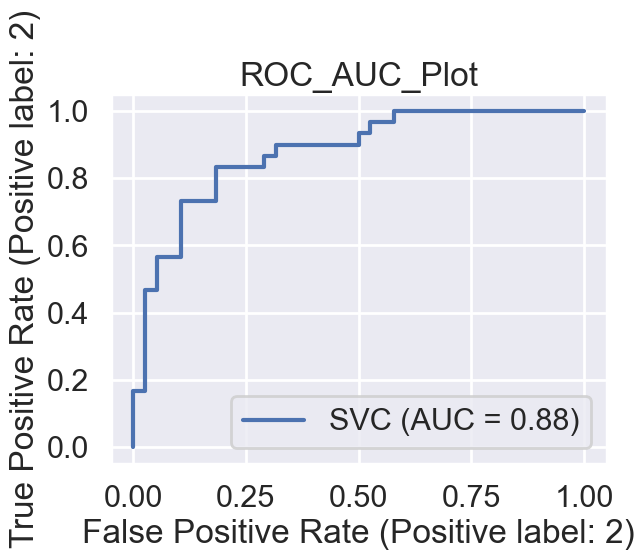

In [223]:
model(svc)

In [60]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[33  5]
 [ 8 22]]
Classification Report               precision    recall  f1-score   support

           1       0.80      0.87      0.84        38
           2       0.81      0.73      0.77        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68



I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [61]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}

In [62]:
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=10)

In [63]:
classifier_svc.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
print(classifier_svc.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [65]:
print(classifier_svc.best_score_)

0.8618577075098814


In [66]:
ypred = classifier_svc.predict(xtest)

acc6=accuracy_score(ytest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 88.83928571428571 %
Testing accuracy score of the model is: 75.0 %


In [67]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred1))
print("Classification Report",classification_report(ytest,ypred1))

Confusion matrix of the model [[32  6]
 [ 7 23]]
Classification Report               precision    recall  f1-score   support

           1       0.82      0.84      0.83        38
           2       0.79      0.77      0.78        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.81        68
weighted avg       0.81      0.81      0.81        68



# 4.Decision Tree Classifier

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITHOUT HYPERPARAMETER TUNING(GridsearchCV)

In [224]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(xtrain, ytrain)

ypred3 = dtc.predict(xtest)

acc7=accuracy_score(ytest,ypred3)
accuracies['DT']=acc7*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, dtc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred3)*100,"%")

Training accuracy score of the model is: 87.94642857142857 %
Testing accuracy score of the model is: 79.41176470588235 %


In [69]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred3))
print("Classification Report",classification_report(ytest,ypred3))

Confusion matrix of the model [[33  5]
 [ 9 21]]
Classification Report               precision    recall  f1-score   support

           1       0.79      0.87      0.82        38
           2       0.81      0.70      0.75        30

    accuracy                           0.79        68
   macro avg       0.80      0.78      0.79        68
weighted avg       0.80      0.79      0.79        68



Accuracy :  79.41%
Cross Validation Score :  90.28%
ROC_AUC Score :  78.42%
Error Rate:  20.59%


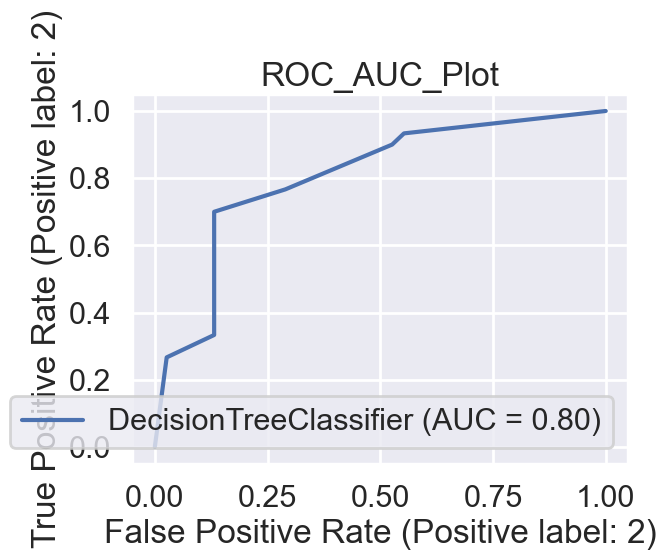

In [225]:
model(dtc)

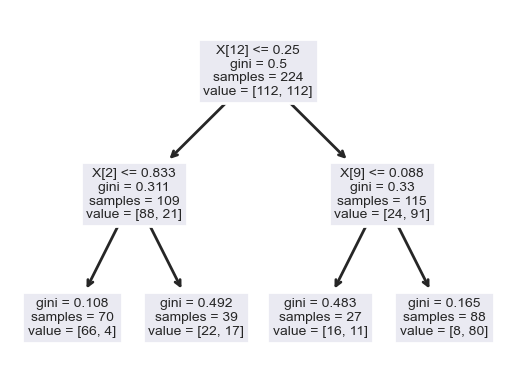

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [70]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(xtrain,ytrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

I. WITHOUT FEATURE SELECTION II. BALANCED III. WITH HYPERPARAMETER TUNING(GridsearchCV)

In [71]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [72]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [73]:
classifier_decisiontree.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [74]:
print(classifier_decisiontree.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'random'}


In [75]:
print(classifier_decisiontree.best_score_)

0.799604743083004


In [76]:
ypred = classifier_decisiontree.predict(xtest)

acc8=accuracy_score(ytest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_decisiontree.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred)*100,"%")

Training accuracy score of the model is: 79.91071428571429 %
Testing accuracy score of the model is: 70.58823529411765 %


# 5.Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(xtrain, ytrain)

ypred5 = rfc.predict(xtest)

acc9=accuracy_score(ytest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, rfc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 97.32142857142857 %
Testing accuracy score of the model is: 75.0 %


In [78]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[30  8]
 [10 20]]
Classification Report               precision    recall  f1-score   support

           1       0.75      0.79      0.77        38
           2       0.71      0.67      0.69        30

    accuracy                           0.74        68
   macro avg       0.73      0.73      0.73        68
weighted avg       0.73      0.74      0.73        68



Accuracy :  73.53%
Cross Validation Score :  93.21%
ROC_AUC Score :  73.16%
Error Rate:  26.47%


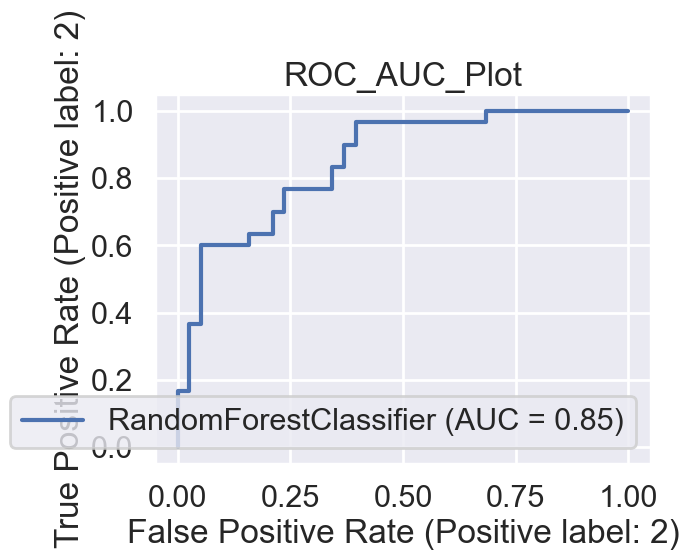

In [227]:
model(rfc)

In [79]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [80]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [81]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=10)

In [82]:
classifier_randomsearch.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=7, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=4,
                                              n_estimators=180),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [83]:
print(classifier_randomsearch.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [84]:
print(classifier_randomsearch.best_score_)

0.8796442687747035


In [85]:
ypred5 =classifier_randomsearch.predict(xtest)

acc10=accuracy_score(ytest,ypred5)
accuracies['RF2']=acc10*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_randomsearch.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred5)*100,"%")

Training accuracy score of the model is: 92.85714285714286 %
Testing accuracy score of the model is: 73.52941176470588 %


In [86]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred5))

print("Classification Report",classification_report(ytest,ypred5))

Confusion matrix of the model [[31  7]
 [11 19]]
Classification Report               precision    recall  f1-score   support

           1       0.74      0.82      0.78        38
           2       0.73      0.63      0.68        30

    accuracy                           0.74        68
   macro avg       0.73      0.72      0.73        68
weighted avg       0.73      0.74      0.73        68



# 6. Gradient Boosting

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(xtrain, ytrain)

ypred6 = gbc.predict(xtest)

acc11 = accuracy_score(ytest,ypred6)
accuracies['GB1']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, gbc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 99.55357142857143 %
Testing accuracy score of the model is: 75.0 %


In [88]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

Accuracy :  75.00%
Cross Validation Score :  90.92%
ROC_AUC Score :  74.47%
Error Rate:  25.00%


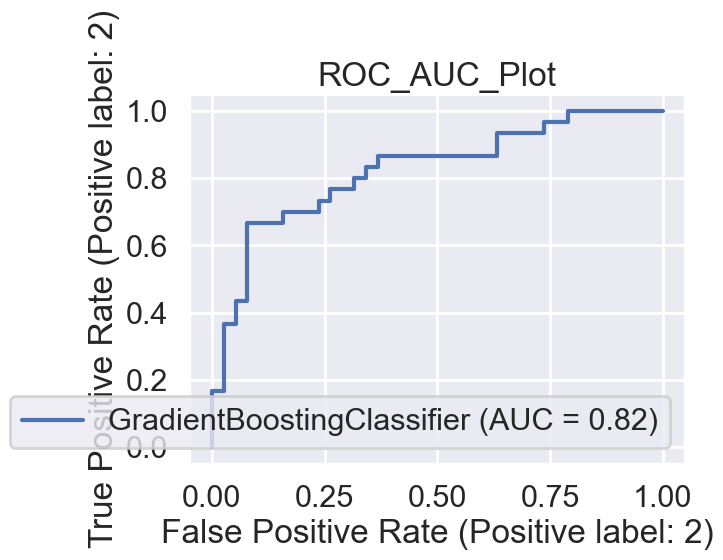

In [230]:
model(gbc)

In [89]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=10)

In [90]:
classifier_Gb.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=180),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [50, 55, 45, 40],
                         'n_estimators': [18, 15],
                         'subsample': [0.2, 0.3, 0.1]},
             scoring='accuracy')

In [91]:
print(classifier_Gb.best_score_)

0.84901185770751


In [92]:
print(classifier_Gb.best_params_)

{'learning_rate': 0.5, 'max_depth': 1, 'min_samples_split': 40, 'n_estimators': 18, 'subsample': 0.3}


In [93]:
ypred6 = classifier_Gb.predict(xtest)

acc12 = accuracy_score(ytest,ypred6)
accuracies['GB2']=acc12*100

print("Training accuracy score of the model is:",accuracy_score(ytrain,classifier_Gb.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred6)*100,"%")

Training accuracy score of the model is: 87.5 %
Testing accuracy score of the model is: 69.11764705882352 %


In [94]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred6))
print("Classification Report",classification_report(ytest,ypred6))

Confusion matrix of the model [[31  7]
 [14 16]]
Classification Report               precision    recall  f1-score   support

           1       0.69      0.82      0.75        38
           2       0.70      0.53      0.60        30

    accuracy                           0.69        68
   macro avg       0.69      0.67      0.68        68
weighted avg       0.69      0.69      0.68        68



# Naive Bayes

In [291]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(xtrain, ytrain)

ypred7 = classifier_NB.predict(xtest)

acc11 = accuracy_score(ytest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, classifier_NB.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred7)*100,"%")

Training accuracy score of the model is: 85.71428571428571 %
Testing accuracy score of the model is: 76.47058823529412 %


Accuracy :  76.47%
Cross Validation Score :  90.28%
ROC_AUC Score :  77.19%
Error Rate:  23.53%


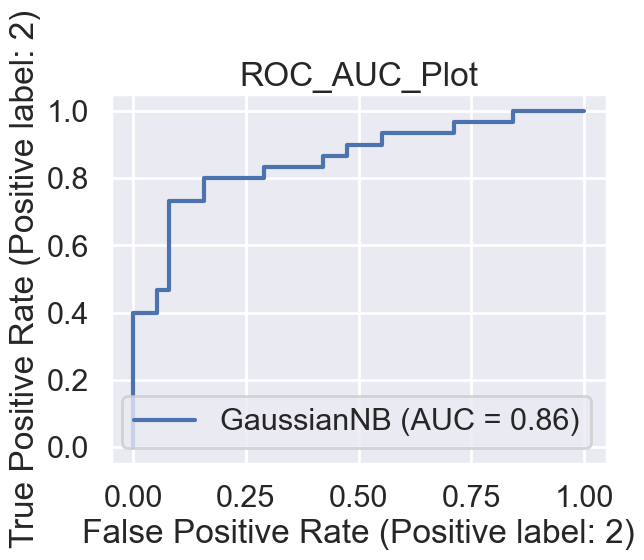

In [292]:
model(classifier_NB)

In [96]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[27 11]
 [ 5 25]]
Classification Report               precision    recall  f1-score   support

           1       0.84      0.71      0.77        38
           2       0.69      0.83      0.76        30

    accuracy                           0.76        68
   macro avg       0.77      0.77      0.76        68
weighted avg       0.78      0.76      0.77        68



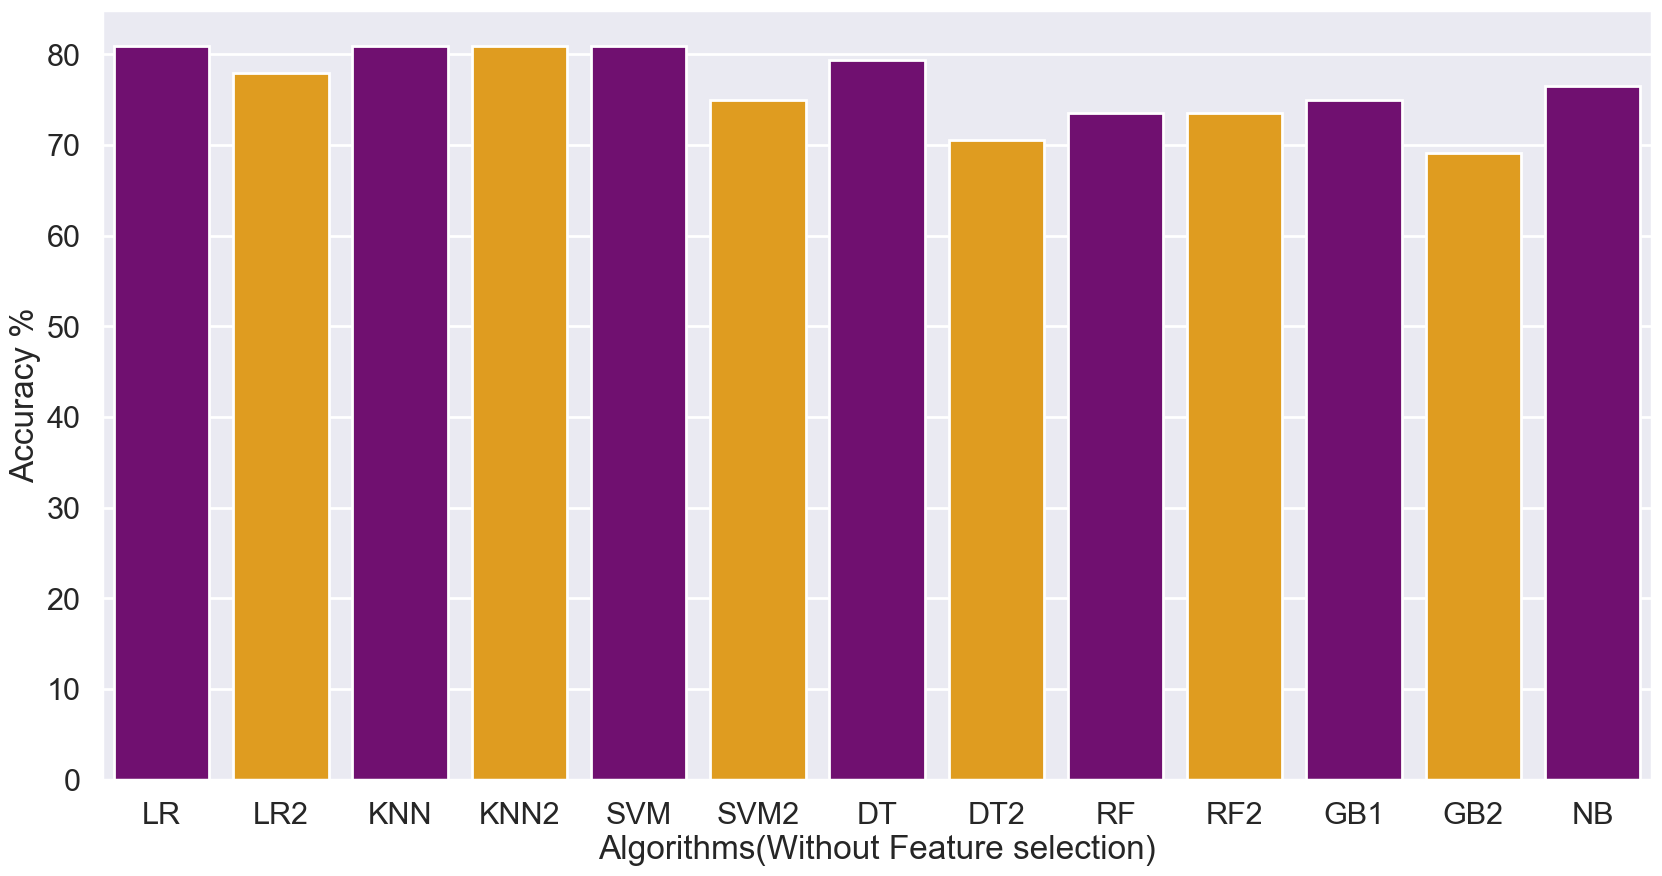

In [97]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

# Particle Swarm Optimization

In [36]:
from sklearn.svm import SVC
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [37]:
X_new=dataset.drop(columns=['target'])
y_new=dataset['target']

In [38]:
X=X_new.to_numpy()
y=y_new.to_numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [40]:
class FeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
       # self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
       # accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        #score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return num_features
       # return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [41]:
problem = FeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization( population_size=10, limit=100,seed=1234)
best_features, best_fitness = algorithm.run(task)

In [42]:
dataset_features=dataset.drop(columns=['target'])
best_features

array([0.97669977, 0.38019574, 0.92324623, 0.26169242, 0.31909706,
       0.11809123, 0.24176629, 0.31853393, 0.96407925, 0.2636498 ,
       0.44100612, 0.60987081, 0.8636213 ])

In [43]:
feature_names=dataset_features.columns.to_numpy()

In [44]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())

print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

print(selected_features)

Number of selected features: 5
Selected features: age, cp, exang, ca, thal
[ True False  True False False False False False  True False False  True
  True]


In [45]:
df=dataset[['age','cp','exang','ca','thal','target']].copy()

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
x = df.drop('target', axis = 1)
Y = df['target']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, Y, test_size = 0.25, stratify = Y, random_state = 0)

# Model creation after PSO Algorithm

In [47]:
def model(classifier):
    
    classifier.fit(Xtrain,Ytrain)
    prediction = classifier.predict(Xtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(Ytest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,Xtrain,Ytrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(Ytest,prediction)))
    plot_roc_curve(classifier, Xtest,Ytest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest,classifier.predict(Xtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(Ytest,classifier.predict(Xtest)))



# 1. Logistic Regression

In [48]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

ypred = lr.predict(X_test)

acc=accuracy_score(y_test,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 85.64814814814815 %
Testing accuracy score of the model is: 87.03703703703704 %


In [49]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[29  1]
 [ 6 18]]
Classification Report               precision    recall  f1-score   support

           1       0.83      0.97      0.89        30
           2       0.95      0.75      0.84        24

    accuracy                           0.87        54
   macro avg       0.89      0.86      0.86        54
weighted avg       0.88      0.87      0.87        54



Accuracy :  85.29%
Cross Validation Score :  90.06%
ROC_AUC Score :  84.04%


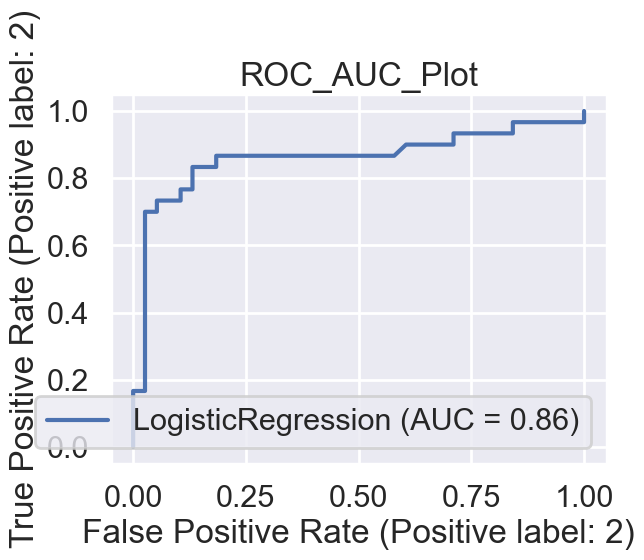

In [50]:
model(lr)

In [112]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [113]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [114]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [115]:
print(classifier_regressor.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [116]:
print(classifier_regressor.best_score_)

0.8472515856236786


In [117]:
ypred = classifier_regressor.predict(X_test)
acc2=accuracy_score(y_test,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_regressor.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 87.5 %
Testing accuracy score of the model is: 87.03703703703704 %


In [118]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[29  1]
 [ 6 18]]
Classification Report               precision    recall  f1-score   support

           1       0.83      0.97      0.89        30
           2       0.95      0.75      0.84        24

    accuracy                           0.87        54
   macro avg       0.89      0.86      0.86        54
weighted avg       0.88      0.87      0.87        54



# 2. KNearestNeighbors

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)

ypred1 = knn.predict(X_test)

acc3=accuracy_score(y_test,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred1)*100,"%")

Training accuracy score of the model is: 75.46296296296296 %
Testing accuracy score of the model is: 79.62962962962963 %


In [120]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

Accuracy :  64.71%
Cross Validation Score :  80.78%
ROC_AUC Score :  62.46%


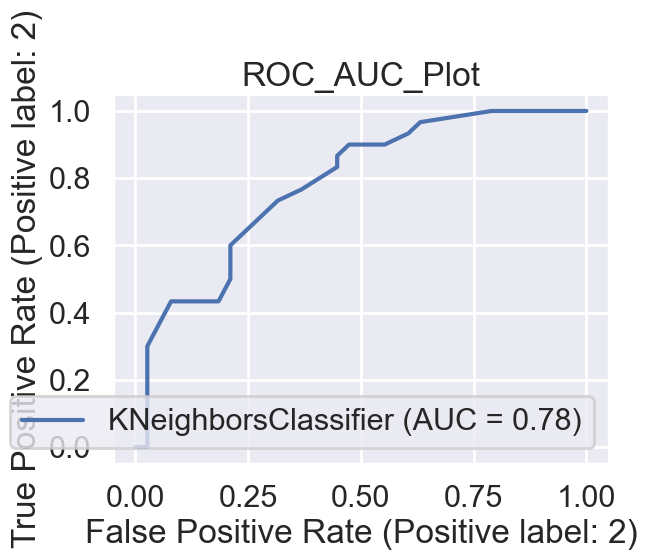

In [246]:
model(knn)

In [121]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(X_train,y_train)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(X_test)

acc4=accuracy_score(y_test,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

In [122]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))

print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[27  3]
 [ 7 17]]
Classification Report               precision    recall  f1-score   support

           1       0.79      0.90      0.84        30
           2       0.85      0.71      0.77        24

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54



# SVM

In [51]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(xtrain, ytrain)

ypred2 = svc.predict(xtest)

acc5=accuracy_score(ytest,ypred2)
accuracies['SVM']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(ytrain, svc.predict(xtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(ytest,ypred2)*100,"%")


Training accuracy score of the model is: 89.28571428571429 %
Testing accuracy score of the model is: 80.88235294117648 %


In [52]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred2))

print("Classification Report",classification_report(ytest,ypred2))

Confusion matrix of the model [[33  5]
 [ 8 22]]
Classification Report               precision    recall  f1-score   support

           1       0.80      0.87      0.84        38
           2       0.81      0.73      0.77        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68



Accuracy :  70.59%
Cross Validation Score :  76.45%
ROC_AUC Score :  69.82%


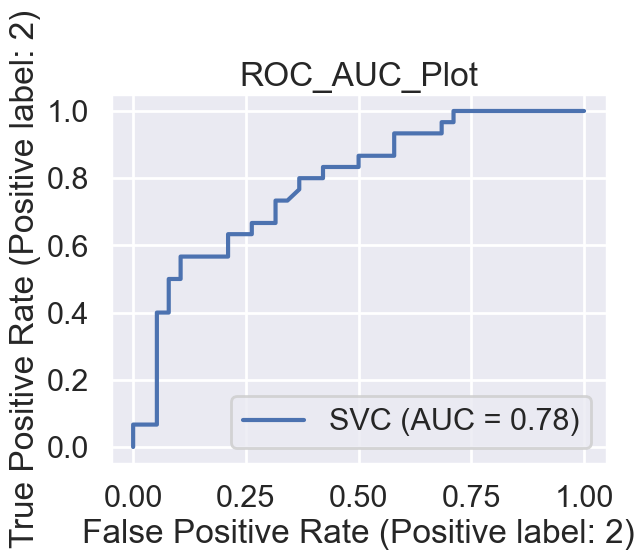

In [53]:
model(svc)

In [54]:
parameter2 ={'C':[1,5],'gamma':[0.1, 0.01],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=2)
classifier_svc.fit(X_train,y_train)
print(classifier_svc.best_params_)

{'C': 5, 'gamma': 0.1, 'kernel': 'linear'}


In [55]:
print(classifier_svc.best_score_)

0.8055555555555556


In [56]:
ypred = classifier_svc.predict(X_test)

In [57]:
acc6=accuracy_score(y_test,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 86.57407407407408 %
Testing accuracy score of the model is: 87.03703703703704 %


In [58]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred))
print("Classification Report",classification_report(y_test,ypred))

Confusion matrix of the model [[28  2]
 [ 5 19]]
Classification Report               precision    recall  f1-score   support

           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



# DECISION TREE

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [251]:
ypred3 = dtc.predict(X_test)

In [252]:
acc7=accuracy_score(y_test,ypred3)
accuracies['DT']=acc7*100

In [253]:
print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred3)*100,"%")

Training accuracy score of the model is: 85.64814814814815 %
Testing accuracy score of the model is: 79.62962962962963 %


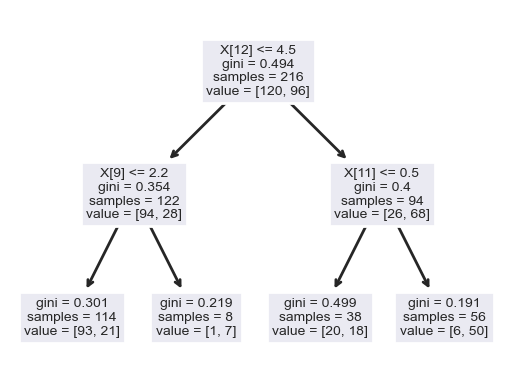

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [135]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

Accuracy :  85.29%
Cross Validation Score :  89.12%
ROC_AUC Score :  83.68%


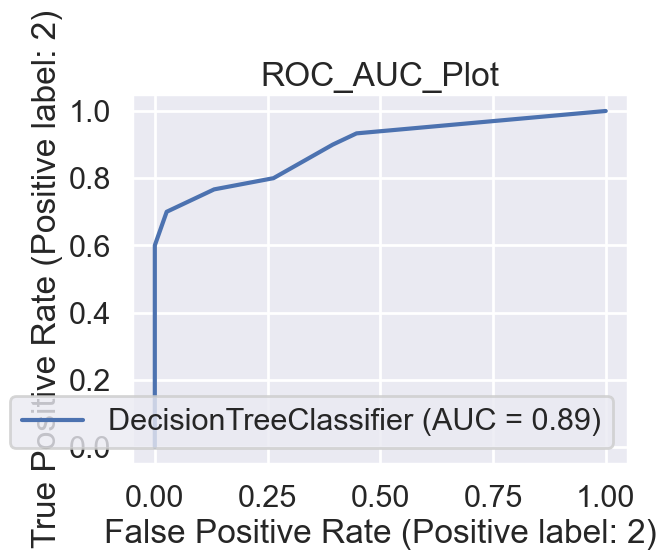

In [254]:
model(dtc)

In [136]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [137]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

classifier_decisiontree.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [138]:
ypred = classifier_decisiontree.predict(X_test)

In [139]:
acc8=accuracy_score(y_test,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_decisiontree.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred)*100,"%")

Training accuracy score of the model is: 81.48148148148148 %
Testing accuracy score of the model is: 75.92592592592592 %


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=180)

In [62]:
ypred5 = rfc.predict(X_test)
acc9=accuracy_score(y_test,ypred5)
accuracies['RF']=acc9*100

In [63]:
print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 97.22222222222221 %
Testing accuracy score of the model is: 88.88888888888889 %


In [64]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))

print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[29  1]
 [ 5 19]]
Classification Report               precision    recall  f1-score   support

           1       0.85      0.97      0.91        30
           2       0.95      0.79      0.86        24

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54



Accuracy :  88.24%
Cross Validation Score :  89.23%
ROC_AUC Score :  87.02%


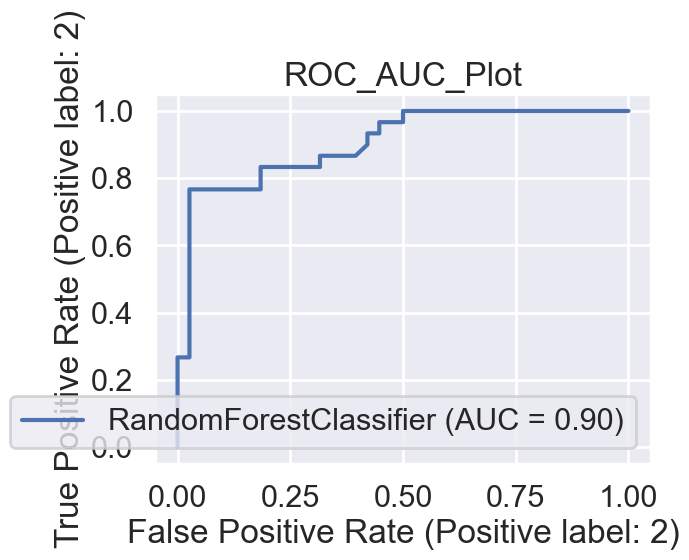

In [65]:
model(rfc)

In [145]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

In [146]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [147]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=10)
classifier_randomsearch.fit(X_train,y_train)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)

{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8612554112554112


In [148]:
ypred5 =classifier_randomsearch.predict(X_test)
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100

In [149]:
acc10=accuracy_score(y_test,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_randomsearch.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred5)*100,"%")

Training accuracy score of the model is: 86.57407407407408 %
Testing accuracy score of the model is: 87.03703703703704 %


In [150]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred5))
print("Classification Report",classification_report(y_test,ypred5))

Confusion matrix of the model [[29  1]
 [ 6 18]]
Classification Report               precision    recall  f1-score   support

           1       0.83      0.97      0.89        30
           2       0.95      0.75      0.84        24

    accuracy                           0.87        54
   macro avg       0.89      0.86      0.86        54
weighted avg       0.88      0.87      0.87        54



# Gradient Boosting

In [260]:
from sklearn.ensemble import GradientBoostingClassifier

In [261]:
gbc = GradientBoostingClassifier()

In [262]:
gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)

In [263]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=180)

In [264]:
ypred6 = gbc.predict(X_test)
acc11 = accuracy_score(y_test,ypred6)
accuracies['GB1']=acc11*100

Accuracy :  83.82%
Cross Validation Score :  86.18%
ROC_AUC Score :  82.37%


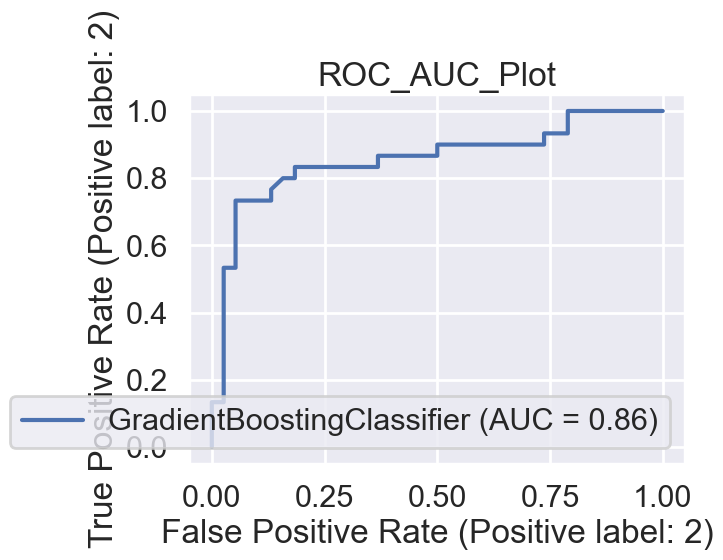

In [265]:
model(gbc)

In [156]:
print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 81.48148148148148 %


In [157]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

In [158]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=3)

In [159]:
classifier_Gb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  n_estimators=180),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [50, 55, 45, 40],
                         'n_estimators': [18, 15],
                         'subsample': [0.2, 0.3, 0.1]},
             scoring='accuracy')

In [160]:
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

0.8148148148148149
{'learning_rate': 0.5, 'max_depth': 3, 'min_samples_split': 40, 'n_estimators': 15, 'subsample': 0.3}


In [161]:
ypred6 = classifier_Gb.predict(X_test)

In [162]:
acc12 = accuracy_score(y_test,ypred6)
accuracies['GB2']=acc12*100

In [163]:
print("Training accuracy score of the model is:",accuracy_score(y_train,classifier_Gb.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred6)*100,"%")

Training accuracy score of the model is: 89.35185185185185 %
Testing accuracy score of the model is: 87.03703703703704 %


# Naive Bayes


In [266]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

ypred7 = classifier_NB.predict(X_test)

acc11 = accuracy_score(y_test,ypred7)
accuracies['NB']=acc11*100

In [165]:
print("Training accuracy score of the model is:",accuracy_score(y_train, classifier_NB.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,ypred7)*100,"%")

Training accuracy score of the model is: 85.18518518518519 %
Testing accuracy score of the model is: 83.33333333333334 %


Accuracy :  82.35%
Cross Validation Score :  88.57%
ROC_AUC Score :  81.05%


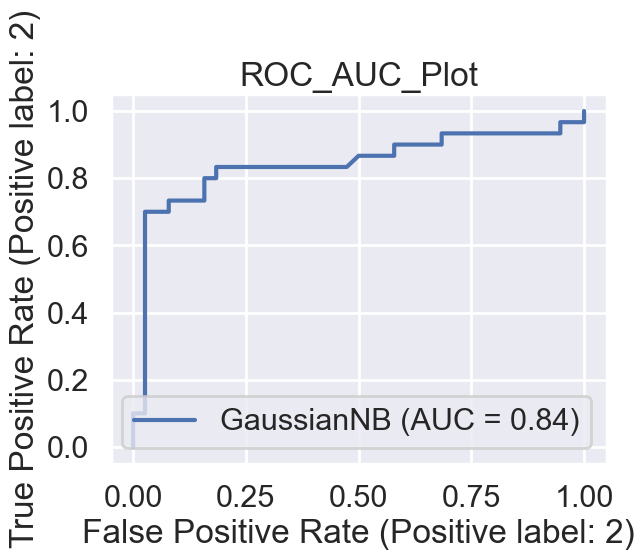

In [267]:
model(classifier_NB)

In [166]:
print("Confusion matrix of the model",confusion_matrix(y_test,ypred7))
print("Classification Report",classification_report(y_test,ypred7))

Confusion matrix of the model [[27  3]
 [ 6 18]]
Classification Report               precision    recall  f1-score   support

           1       0.82      0.90      0.86        30
           2       0.86      0.75      0.80        24

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.84      0.83      0.83        54



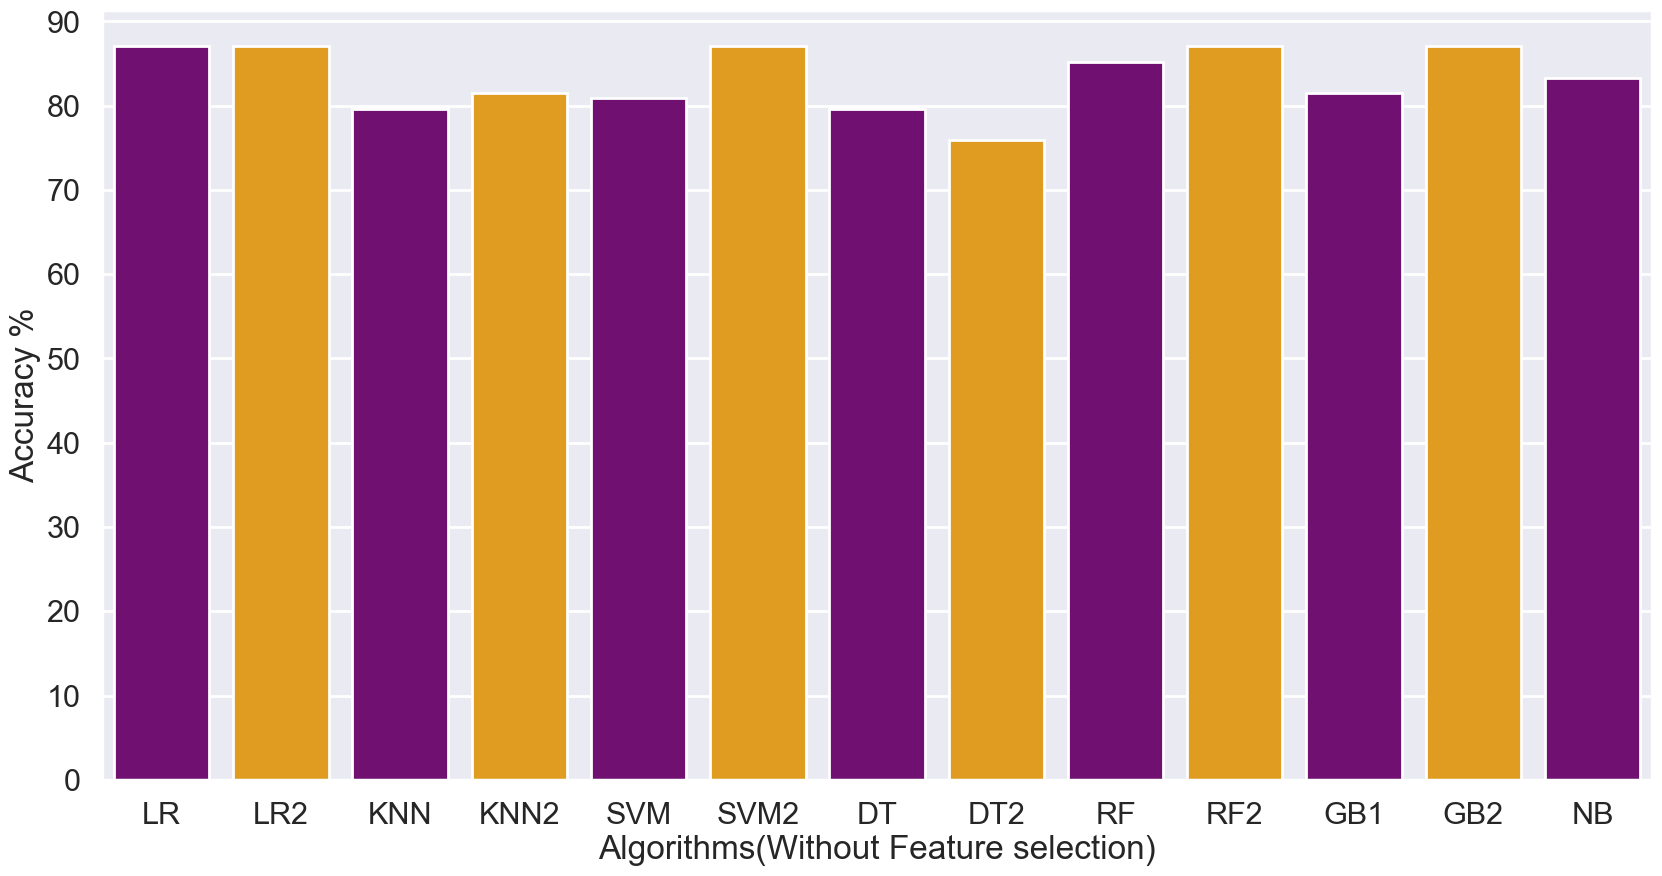

In [167]:
colors = ["purple", "orange"]
# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [67]:
import pickle
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
# Load the model from the file
with open('heart_disease_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
import gradio as gr

def predict_heart_disease(age, sex, cp, chol,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    # Format the input data as required by your model
    input_data = [[age, sex, cp, chol,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
    # Make prediction
    prediction = model.predict(input_data)
    return f"Heart Disease Prediction: {'Have chances of Heart Disease' if prediction[0] == 1 else 'no chance'}"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.inputs.Number(label="age"),
        gr.inputs.Radio(choices=[0, 1], label="Sex (0: Female, 1: Male)"),
        gr.inputs.Number(label="Blood Pressure"),
        gr.inputs.Number(label="Cholesterol")
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter your details to get a prediction on heart disease risk."
)

# Launch the interface
iface.launch()


# Model creation after Forward Feature Selection

In [268]:
data=dataset[['age', 'cp', 'chol', 'restecg', 'thalach', 'ca', 'thal','target']].copy()
data_set=dataset[['cp','thal','oldpeak','exang','thalach','slope','ca','chol','target']].copy()

In [269]:
from sklearn.model_selection import train_test_split, GridSearchCV
xxx = data_set.drop('target', axis = 1)
YYY = data_set['target']
XXXtrain, XXXtest, YYYtrain, YYYtest = train_test_split(xxx, YYY, test_size = 0.25, stratify = YYY, random_state = 0)

In [270]:
xx = data.drop('target', axis = 1)
YY = data['target']
XXtrain, XXtest, YYtrain, YYtest = train_test_split(xx, YY, test_size = 0.25, stratify = YY, random_state = 0)

In [271]:
def model(classifier):
    
    classifier.fit(XXtrain,YYtrain)
    prediction = classifier.predict(XXtest)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(YYtest,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,XXtrain,YYtrain,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(YYtest,prediction)))
    plot_roc_curve(classifier, XXtest,YYtest)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(YYtest,classifier.predict(XXtest))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap ='BrBG' ,fmt ='')
    
    # Classification Report
    print(classification_report(YYtest,classifier.predict(XXtest)))

# 1. Logistic Regression

In [272]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(XXtrain,YYtrain)

ypred = lr.predict(XXtest)

acc=accuracy_score(YYtest,ypred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, lr.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 86.13861386138613 %
Testing accuracy score of the model is: 79.41176470588235 %


In [173]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[34  4]
 [10 20]]
Classification Report               precision    recall  f1-score   support

           1       0.77      0.89      0.83        38
           2       0.83      0.67      0.74        30

    accuracy                           0.79        68
   macro avg       0.80      0.78      0.79        68
weighted avg       0.80      0.79      0.79        68



Accuracy :  79.41%
Cross Validation Score :  90.55%
ROC_AUC Score :  78.07%


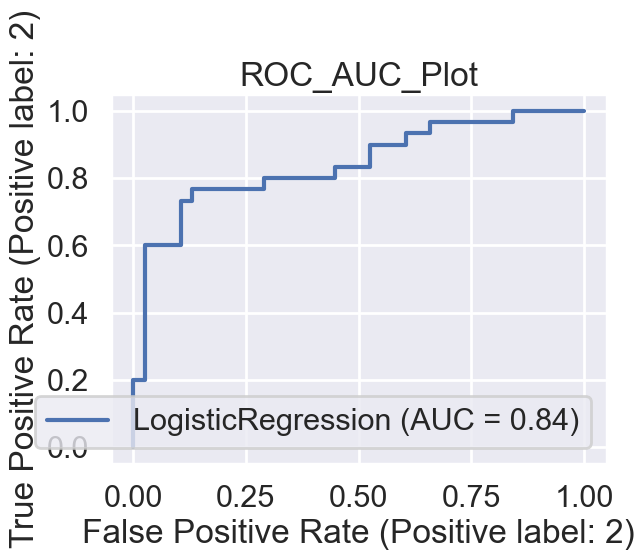

In [273]:
model(lr)

In [174]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'solver':['newton-cg','lbfgs','liblinear']}

In [175]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [176]:
classifier_regressor.fit(XXtrain,YYtrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [177]:
print(classifier_regressor.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [178]:
print(classifier_regressor.best_score_)

0.8662195121951219


In [179]:
ypred = classifier_regressor.predict(XXtest)
acc2=accuracy_score(YYtest,ypred)
accuracies['LR2']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_regressor.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 86.13861386138613 %
Testing accuracy score of the model is: 79.41176470588235 %


In [180]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[34  4]
 [10 20]]
Classification Report               precision    recall  f1-score   support

           1       0.77      0.89      0.83        38
           2       0.83      0.67      0.74        30

    accuracy                           0.79        68
   macro avg       0.80      0.78      0.79        68
weighted avg       0.80      0.79      0.79        68



# 2. KNearestNeighbors

In [274]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)

knn.fit(XXtrain,YYtrain)

ypred1 = knn.predict(XXtest)

acc3=accuracy_score(YYtest,ypred1)
accuracies['KNN']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred1)*100,"%")

Training accuracy score of the model is: 73.76237623762376 %
Testing accuracy score of the model is: 70.58823529411765 %


In [182]:
k_range = list(range(15, 30))
parameter = dict(n_neighbors=k_range)

Accuracy :  70.59%
Cross Validation Score :  81.30%
ROC_AUC Score :  68.77%


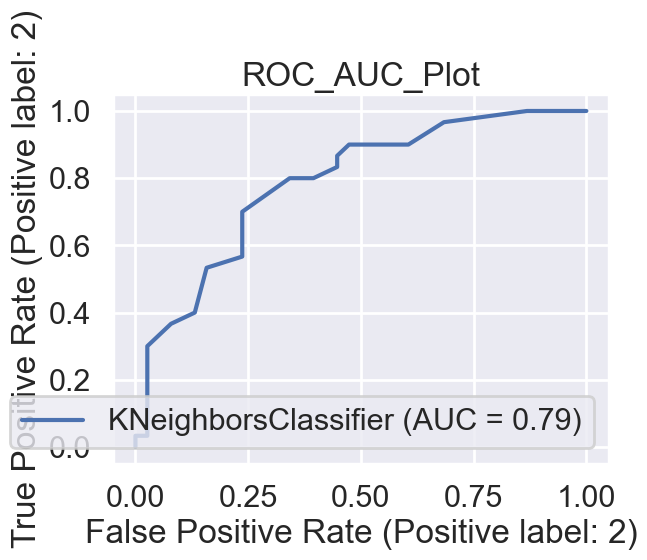

In [275]:
model(knn)

In [183]:
classifier_knn=GridSearchCV(knn,param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=2)

classifier_knn.fit(XXtrain,YYtrain)

print(classifier_knn.best_params_)

print(classifier_knn.best_score_)

ypred = classifier_knn.predict(XXtest)

acc4=accuracy_score(YYtest,ypred)
accuracies['KNN2']=acc4*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_knn.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=17; total time=   0.0s
[CV] END .....................................n_

In [184]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred))
print("Classification Report",classification_report(YYtest,ypred))

Confusion matrix of the model [[32  6]
 [16 14]]
Classification Report               precision    recall  f1-score   support

           1       0.67      0.84      0.74        38
           2       0.70      0.47      0.56        30

    accuracy                           0.68        68
   macro avg       0.68      0.65      0.65        68
weighted avg       0.68      0.68      0.66        68



# 3. SVM

In [276]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(XXtrain, YYtrain)

ypred2 = svc.predict(XXtest)

acc5=accuracy_score(YYtest,ypred2)
accuracies['SVM']=acc5*100

In [186]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred2)*100,"%")

Training accuracy score of the model is: 68.8118811881188 %
Testing accuracy score of the model is: 70.58823529411765 %


Accuracy :  70.59%
Cross Validation Score :  76.22%
ROC_AUC Score :  69.82%


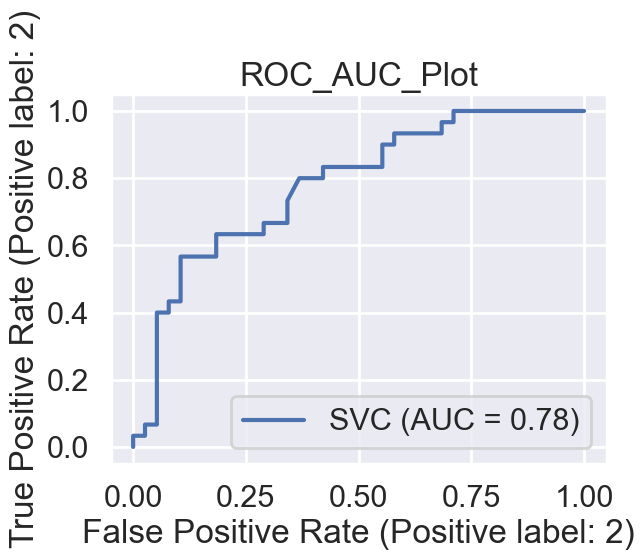

In [277]:
model(svc)

In [187]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred2))
print("Classification Report",classification_report(YYtest,ypred2))


Confusion matrix of the model [[29  9]
 [11 19]]
Classification Report               precision    recall  f1-score   support

           1       0.72      0.76      0.74        38
           2       0.68      0.63      0.66        30

    accuracy                           0.71        68
   macro avg       0.70      0.70      0.70        68
weighted avg       0.70      0.71      0.70        68



In [188]:
parameter2 ={'C':[1, 10, 100],'gamma':[0.001, 0.0001],'kernel': ['linear','rbf']}
classifier_svc=GridSearchCV(svc,param_grid=parameter2,scoring='accuracy',cv=3)

In [189]:
classifier_svc.fit(XXtrain,YYtrain)

print(classifier_svc.best_params_)
print(classifier_svc.best_score_)

ypred = classifier_svc.predict(XXtest)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.8614281533508926


In [190]:
acc6=accuracy_score(YYtest,ypred)
accuracies['SVM2']=acc6*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_svc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 86.13861386138613 %
Testing accuracy score of the model is: 75.0 %


In [191]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred1))
print("Classification Report",classification_report(YYtest,ypred1))

Confusion matrix of the model [[32  6]
 [14 16]]
Classification Report               precision    recall  f1-score   support

           1       0.70      0.84      0.76        38
           2       0.73      0.53      0.62        30

    accuracy                           0.71        68
   macro avg       0.71      0.69      0.69        68
weighted avg       0.71      0.71      0.70        68



# 4. DECISION TREE

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 10,min_samples_leaf = 10 )
dtc.fit(XXtrain, YYtrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=1000)

In [280]:
ypred3 = dtc.predict(XXtest)

In [281]:
acc7=accuracy_score(YYtest,ypred3)
accuracies['DT']=acc7*100

In [196]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, dtc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred3)*100,"%")

Training accuracy score of the model is: 85.64356435643565 %
Testing accuracy score of the model is: 85.29411764705883 %


Accuracy :  85.29%
Cross Validation Score :  84.32%
ROC_AUC Score :  84.04%


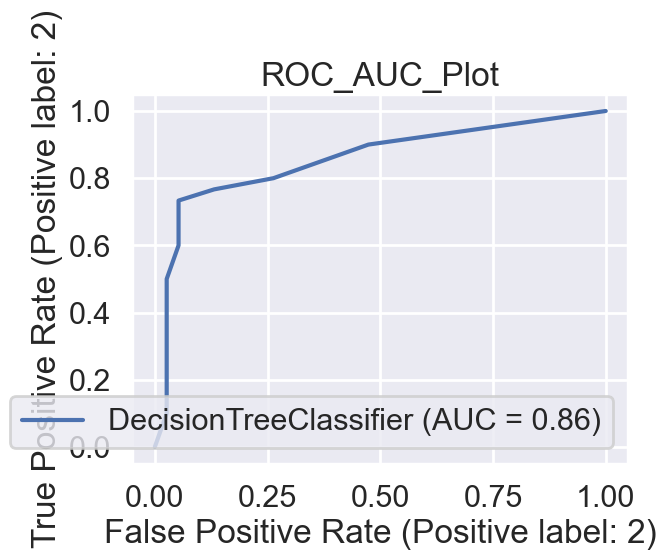

In [282]:
model(dtc)

In [197]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred3))
print("Classification Report",classification_report(YYtest,ypred3))

Confusion matrix of the model [[36  2]
 [ 8 22]]
Classification Report               precision    recall  f1-score   support

           1       0.82      0.95      0.88        38
           2       0.92      0.73      0.81        30

    accuracy                           0.85        68
   macro avg       0.87      0.84      0.85        68
weighted avg       0.86      0.85      0.85        68



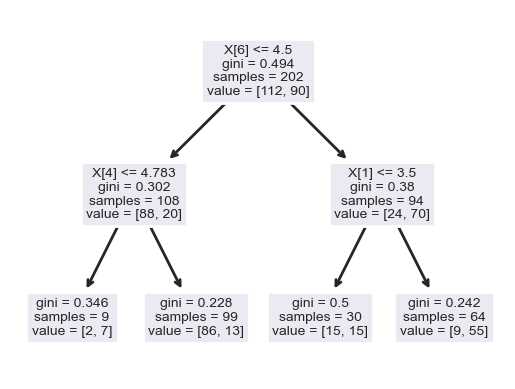

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [198]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(XXtrain,YYtrain)
from sklearn.tree import plot_tree
plot_tree(tree,fontsize=10)
plt.show()
plt.figure(figsize=(100,100))

In [199]:
parameter1 ={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}

In [200]:
classifier_decisiontree=GridSearchCV(dtc,param_grid=parameter1,scoring='accuracy',cv=10)

In [201]:
classifier_decisiontree.fit(XXtrain,YYtrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                              random_state=1000),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [202]:
ypred = classifier_decisiontree.predict(XXtest)

acc8=accuracy_score(YYtest,ypred)
accuracies['DT2']=acc8*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_decisiontree.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred)*100,"%")

Training accuracy score of the model is: 82.67326732673267 %
Testing accuracy score of the model is: 83.82352941176471 %


In [284]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(XXtrain, YYtrain)
ypred5 = rfc.predict(XXtest)
acc9=accuracy_score(YYtest,ypred5)
accuracies['RF']=acc9*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, rfc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))

print("Classification Report",classification_report(YYtest,ypred5))


Training accuracy score of the model is: 95.54455445544554 %
Testing accuracy score of the model is: 80.88235294117648 %
Confusion matrix of the model [[35  3]
 [10 20]]
Classification Report               precision    recall  f1-score   support

           1       0.78      0.92      0.84        38
           2       0.87      0.67      0.75        30

    accuracy                           0.81        68
   macro avg       0.82      0.79      0.80        68
weighted avg       0.82      0.81      0.80        68



In [204]:
n_estimators=[100]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]
min_samples_split=[2,5]

Accuracy :  80.88%
Cross Validation Score :  90.14%
ROC_AUC Score :  79.39%


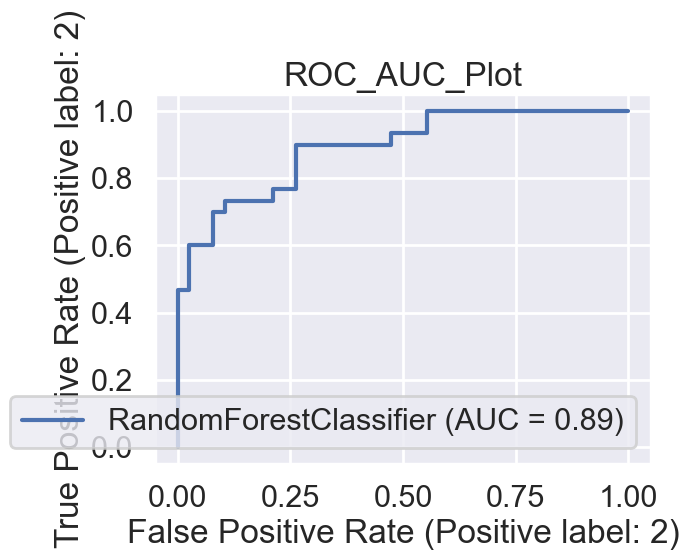

In [285]:
model(rfc)

In [205]:
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap,'min_samples_split':min_samples_split}

In [206]:
classifier_randomsearch=GridSearchCV(rfc,param_grid,scoring='accuracy',cv=3)

In [207]:
classifier_randomsearch.fit(XXtrain,YYtrain)
print(classifier_randomsearch.best_params_)
print(classifier_randomsearch.best_score_)
ypred5 =classifier_randomsearch.predict(XXtest)
acc10=accuracy_score(YYtest,ypred5)
accuracies['RF2']=acc10*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_randomsearch.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred5)*100,"%")

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8516242317822652
Training accuracy score of the model is: 91.58415841584159 %
Testing accuracy score of the model is: 83.82352941176471 %


In [208]:
print("Confusion matrix of the model",confusion_matrix(YYtest,ypred5))
print("Classification Report",classification_report(YYtest,ypred5))

Confusion matrix of the model [[36  2]
 [ 9 21]]
Classification Report               precision    recall  f1-score   support

           1       0.80      0.95      0.87        38
           2       0.91      0.70      0.79        30

    accuracy                           0.84        68
   macro avg       0.86      0.82      0.83        68
weighted avg       0.85      0.84      0.83        68



# 6. Gradient Boosting

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(XXtrain, YYtrain)

ypred6 = gbc.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred6)
accuracies['GB1']=acc11*100

In [210]:
print("Training accuracy score of the model is:",accuracy_score(YYtrain, gbc.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

Training accuracy score of the model is: 98.51485148514851 %
Testing accuracy score of the model is: 77.94117647058823 %


Accuracy :  77.94%
Cross Validation Score :  86.40%
ROC_AUC Score :  76.40%


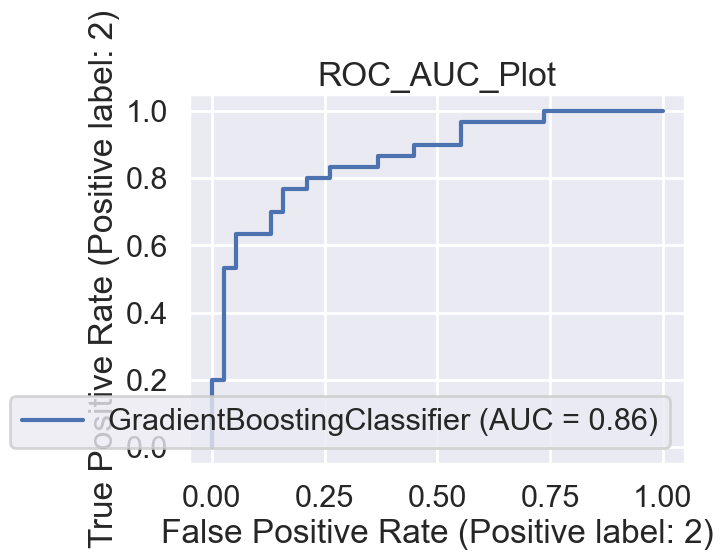

In [287]:
model(gbc)

In [211]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {
    'learning_rate': [0.5],
    'subsample': [0.2, 0.3, 0.1],
    'n_estimators': [18,15],
    'max_depth': [ 1,2,3,4],
    'min_samples_split':[50,55,45,40]
}

In [212]:
classifier_Gb=GridSearchCV(gbc,param_grid=parameters,scoring='accuracy',cv=3)
classifier_Gb.fit(XXtrain,YYtrain)
print(classifier_Gb.best_score_)
print(classifier_Gb.best_params_)

0.8268949370793092
{'learning_rate': 0.5, 'max_depth': 2, 'min_samples_split': 40, 'n_estimators': 15, 'subsample': 0.3}


In [213]:
ypred6 = classifier_Gb.predict(XXtest)
acc12 = accuracy_score(YYtest,ypred6)
accuracies['GB2']=acc12*100
print("Training accuracy score of the model is:",accuracy_score(YYtrain,classifier_Gb.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred6)*100,"%")

Training accuracy score of the model is: 88.11881188118812 %
Testing accuracy score of the model is: 76.47058823529412 %


# 7. Naive Bayes

In [288]:
from sklearn.naive_bayes import GaussianNB

classifier_NB = GaussianNB()
classifier_NB.fit(XXtrain, YYtrain)

ypred7 = classifier_NB.predict(XXtest)

acc11 = accuracy_score(YYtest,ypred7)
accuracies['NB']=acc11*100

print("Training accuracy score of the model is:",accuracy_score(YYtrain, classifier_NB.predict(XXtrain))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(YYtest,ypred7)*100,"%")

Training accuracy score of the model is: 85.14851485148515 %
Testing accuracy score of the model is: 79.41176470588235 %


In [215]:
print("Confusion matrix of the model",confusion_matrix(ytest,ypred7))
print("Classification Report",classification_report(ytest,ypred7))

Confusion matrix of the model [[33  5]
 [ 9 21]]
Classification Report               precision    recall  f1-score   support

           1       0.79      0.87      0.82        38
           2       0.81      0.70      0.75        30

    accuracy                           0.79        68
   macro avg       0.80      0.78      0.79        68
weighted avg       0.80      0.79      0.79        68



Accuracy :  79.41%
Cross Validation Score :  89.20%
ROC_AUC Score :  78.42%


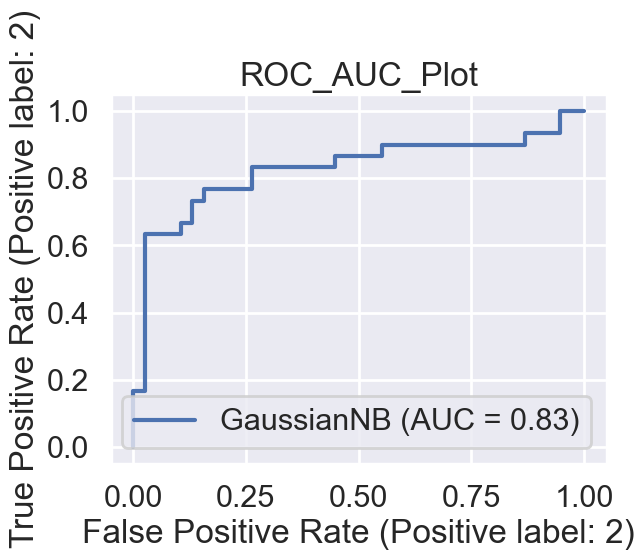

In [289]:
model(classifier_NB)

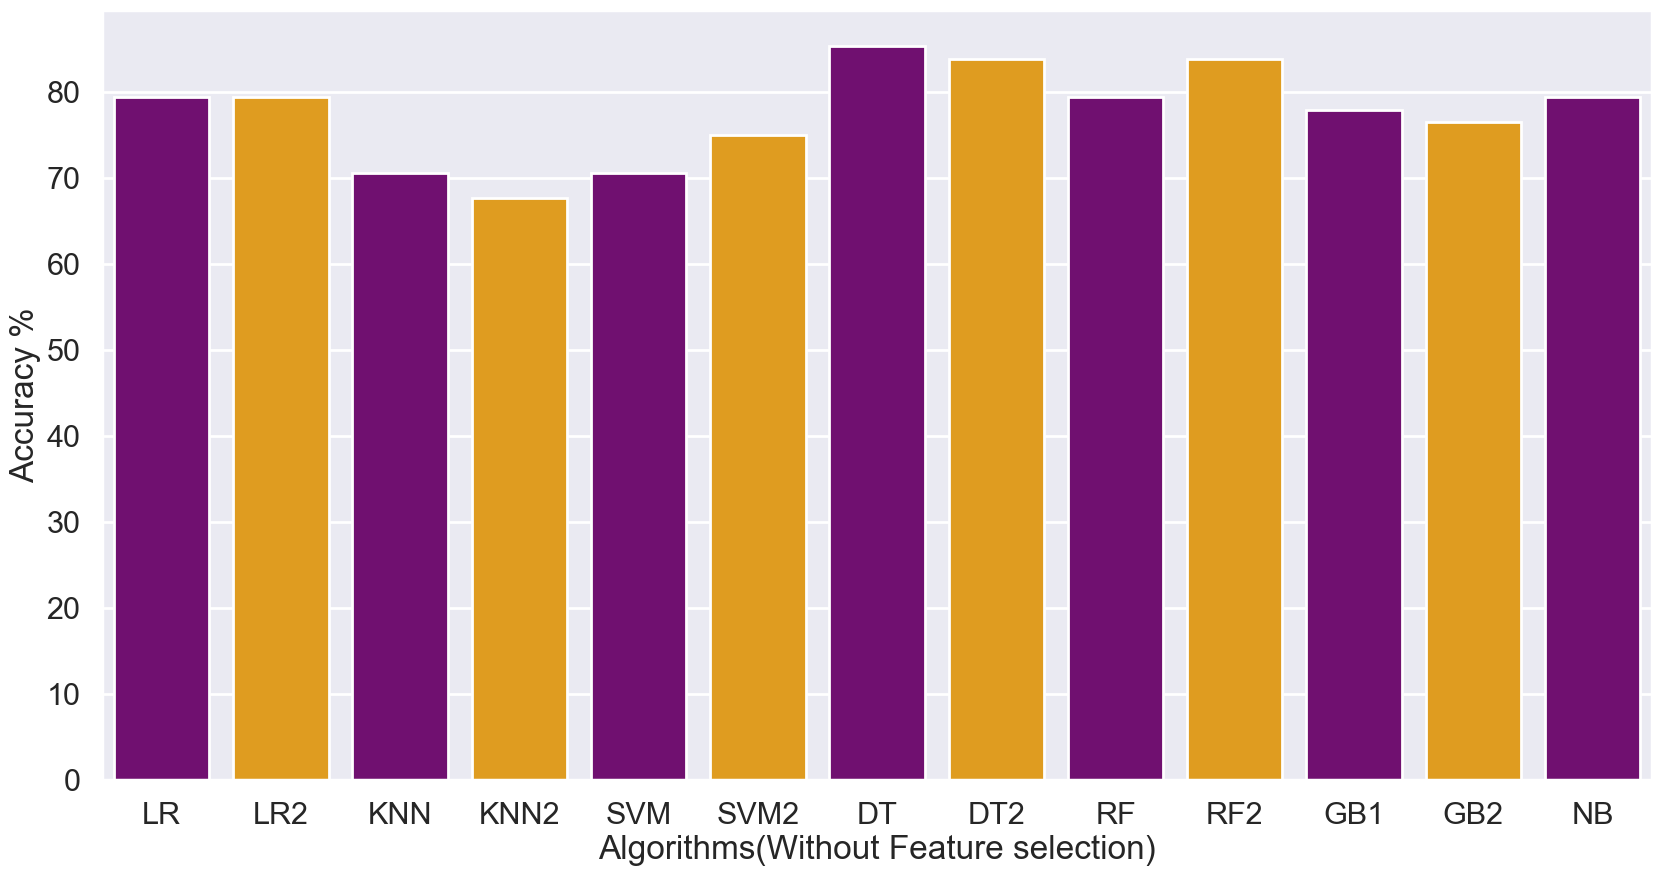

In [216]:
colors = ["purple", "orange"]

# sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms(Without Feature selection)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()